<a href="https://colab.research.google.com/github/chicolucio/panorama-covid-mundo/blob/master/projeto_covid_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 no mundo

Por: [Francisco Bustamante](https://franciscobustamante.com.br/)

*Recomendada a abertura do notebook do Google Colab para uma melhor visualização.*

---

A COVID-19 é uma doença infecciosa causada por um recém-descoberto coronavírus.

Estamos completando quase 2 anos desde o surgimento do vírus COVID-19. As medidas para controle pandêmico adotadas por governos em todo mundo  afetaram significativamente a rotina de todos e é de grande interesse acompanharmos a evolução da pandemia para saber seus reais efeitos e avaliar o retorno ao convívio normal.

<center><img alt="covid_banner" width="70%" src="https://raw.githubusercontent.com/chicolucio/panorama-covid-mundo/master/images/evolucao_casos_banner.gif"></center>

Neste trabalho, uma análise exploratória dos dados fornecidos pela Our World in Data (OWID) é feita, mostrando o avanço temporal de casos, óbitos e vacinação. Estudos comparativos e busca de correlações são feitos com intuito de melhor compreender os dados. Animações como a mostrada acima serão criadas e interpretadas.

## Obtenção dos dados


<left><img alt="covid_banner" width="10%" src="https://ourworldindata.org/uploads/2019/02/OurWorldinData-logo.png"></left>
Como já citado, os dados aqui utilizados são fornecidos pela *Our World in Data* (OWID) [neste repositório](https://github.com/owid/covid-19-data), uma organização que reúne pesquisadores de todo o mundo para agregar dados de diversas fontes sobre os mais diversos problemas contemporâneos.

Obviamente que por ser uma doença recente cuidados devem ser tomados no que diz respeito à interpretação dos dados e relações de causa e efeito. Como será mostrado adiante, nem todos os países fornecem dados completos e há algumas inconsistências nos dados a depender de suas origens. Além disso, com o crescente conhecimento a respeito da doença, por vezes se faz necessário alterar a forma de agregar os dados, causando algumas dificuldades de análise temporal. Não podemos ignorar também o fato de que, infelizmente, a visão passada por veículos de mídia e governantes para população pode variar e ser distorcida a depender dos interesses momentâneos dos mesmos.

Assim, durante esse estudo, especial cuidado é destinado em apresentar os dados e buscar interpretá-los de forma rigorosa deixando claro eventuais limitações, conflitos e condições de contorno de cada análise. E, sempre lembrando, correlações não implicam em causalidade.

### Dicionário de variáveis

A base de dados da OWID apresenta 65 variáveis (colunas). Para deixar o trabalho mais fácil de entender, segue  o significado de cada variável divido por categoria:

* Categoria geral / outros

|Atributo|Descrição|
|:-------|:---------|
| iso_code | Código de 3 letras para o país definido de acordo com a [ISO 3166-1 alfa-3](https://pt.wikipedia.org/wiki/ISO_3166-1_alfa-3)|
| continent | Continente do país ou região|
| location | Nome do país ou região|
| date | Data da observação|
| population | População em 2020.|
| population_density | Número de pessoas dividido pela área terrestre, medido em quilômetros quadrados, para o ano mais recente disponível|
| median_age | Mediana da idade da população de acordo com projeção da ONU para 2020|
| aged_65_older | Parcela da população com 65 anos ou mais, considerando o ano mais recente disponível|
| aged_70_older | Parcela da população com 70 anos ou mais em 2015|
| gdp_per_capita | Produto interno bruto per capita para o ano mais recente disponível|
| extreme_poverty | Parcela da população que vive em pobreza extrema, para o ano mais recente disponível desde 2010|
| cardiovasc_death_rate | Taxa de mortalidade por doenças cardiovasculares em 2017 (número anual de mortes por 100.000 pessoas)|
| diabetes_prevalence | Prevalência de diabetes (% da população de 20 a 79 anos) em 2017|
| female_smokers | Parcela de mulheres que fumam, ano mais recente disponível|
| male_smokers | Parcela de homens que fumam, ano mais recente disponível|
| handwashing_facilities | Parcela da população com instalações básicas para lavagem das mãos, ano mais recente disponível|
| hospital_beds_per_thousand | Leitos hospitalares por 1.000 pessoas, ano mais recente disponível desde 2010|
| life_expectancy | Expectativa de vida ao nascer em 2019|
| human_development_index | Um índice composto que mede o desempenho médio em três dimensões básicas do desenvolvimento humano: uma vida longa e saudável,<br>conhecimento e um padrão de vida decente. Valores para 2019|


* Categoria casos

|Atributo|Descrição|
|:-------|:---------|
| total_cases | Total de casos confirmados de COVID-19|
| new_cases | Novos casos confirmados de COVID-19.|
| new_cases_smoothed | Novos casos confirmados (média móvel de 7 dias).|
| total_cases_per_million | Total de casos de COVID-19 por milhão de pessoas.
| new_cases_per_million | Novos casos confirmados de COVID-19 por milhão de pessoas.
| new_cases_smoothed_per_million | Novos casos confirmados de COVID-19 por milhão de pessoas (média móvel de 7 dias).

* Categoria mortes

|Atributo|Descrição|
|:-------|:---------|
| total_deaths | Total de mortes atribuídas ao COVID-19.|
| new_deaths | Novas mortes atribuídas ao COVID-19 .|
| new_deaths_smoothed | Novas mortes atribuídas ao COVID-19 (média móvel de 7 dias).
| total_deaths_per_million | Total de mortes por COVID-19 por milhão de pessoas.
| new_deaths_per_million | Novas mortes por COVID-19 por milhão de pessoas.
| new_deaths_smoothed_per_million | Novas mortes por COVID-19 por milhão de pessoas (média móvel de 7 dias).

* Categoria taxa de reprodução (R)

|Atributo|Descrição|
|:-------|:---------|
| reproduction_rate | Estimativa em tempo real da taxa efetiva de reprodução (R) do COVID-19.

* Categoria hospitalização e UTI

|Atributo|Descrição|
|:-------|:---------|
| icu_patients | Número de pacientes com COVID-19 em unidades de terapia intensiva (UTI) em um dado dia
| icu_patients_per_million | Número de pacientes com COVID-19 em unidades de terapia intensiva (UTI) em um dado dia por milhão de pessoas
| hosp_patients | Número de pacientes hospitalizados em um dado dia
| hosp_patients_per_million | Número de pacientes hospitalizados em um dado dia por milhão de pessoas 
| weekly_icu_admissions | Número de novos pacientes em UTI em uma dada semana. 
| weekly_icu_admissions_per_million | Número de novos pacientes em UTI em uma dada semana por milhão de pessoas
| weekly_hosp_admissions | Número de novos pacientes com COVID-19 hospitalizados em uma dada semana.
| weekly_hosp_admissions_per_million | Número de novos pacientes com COVID-19 hospitalizados em uma dada semana por milhão de pessoas

* Categoria testes

|Atributo|Descrição|
|:-------|:---------|
| total_tests | Total de testes para COVID-19 
| new_tests | Novos testes para COVID-19 (calculado apenas para dias consecutivos)
| total_tests_per_thousand | Total de testes para COVID-19 por mil pessoas
| new_tests_per_thousand | Novos testes para COVID-19 por mil pessoas.
| new_tests_smoothed | Novos testes para COVID-19 (média móvel de 7 dias)
| new_tests_smoothed_per_thousand | Novos testes para COVID-19 (média móvel 7 dias) por mil pessoas.
| positive_rate | A parcela de testes COVID-19 que são positivos, dada como uma média móvel de 7 dias (é o inverso de _`tests_per_case`_).
| tests_per_case | Testes conduzidos para cada novo caso confirmado de COVID-19, dado como uma média móvel de 7 dias (é o inverso de _`positive_rate`_)
| tests_units | Unidades usadas pela localidade para reportar os dados de testes

* Categoria vacinação

|Atributo|Descrição|
|:-------|:---------|
| total_vaccinations | Total de vacinas administradas
| people_vaccinated | Total de pessoas que receberam pelo menos uma dose da vacina
| people_fully_vaccinated | Total de pessoas que receberam todas as doses prescritas pelos protocolos de vacinação
| new_vaccinations | Novas doses de vacinas administradas (contado apenas para dias consecutivos)
| new_vaccinations_smoothed | Novas doses de vacinas administradas (média móvel de 7 dias)
| total_vaccinations_per_hundred | Quantidade de doses administradas por 100 pessoas
| people_vaccinated_per_hundred | Total de pessoas que receberam pelo menos uma dose da vacina por 100 pessoas 
| people_fully_vaccinated_per_hundred | Total de pessoas que receberam todas as doses preescritas pelo protocolo de vacinação por 100 pessoas
| new_vaccinations_smoothed_per_million | Novas doses de vacina administradas (média móvel de 7 dias) por milhão de pessoas

* Categoria política governamental

|Atributo|Descrição|
|:-------|:---------|
| stringency_index | Índice de Restrição de Resposta do Governo: medida composta com base em 9 indicadores de resposta, <br>incluindo fechamentos de escolas, fechamentos de locais de trabalho e proibições de viagens, <br>redimensionado para um valor de 0 a 100 (100 = resposta mais estrita)|

* Categoria excesso de mortes

|Atributo|Descrição|
|:-------|:---------|
| excess_mortality | diferença percentual entre o número reportado de mortes semanal ou mensalmente em 2020-2021 e o número projetado com base em anos anteriores
| excess_mortality_cumulative | idem anterior, sendo que acumulado desde Janeiro de 2020
| excess_mortality_cumulative_absolute | idem anterior, mas em números absolutos ao invés de percentuais
| excess_mortality_cumulative_per_million | idem anterior, por milhão de pessoas

### Importando os dados e pacotes necessários

O pacote [Pandas](https://pandas.pydata.org/) foi utilizado para trabalhar com os dados e construir matrizes de correlações. Os pacotes [Matplotlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/) e [Plotly](https://plotly.com/) foram utilizados para construir os gráficos. A biblioteca `datetime`, presente em uma instalação padrão do Python, foi utilizada para lidar com datas. 

In [1]:
!pip install matplotlib==3.4.3 -q &> /dev/null
!pip install plotly==5.3.1 -q &> /dev/null
!git clone https://github.com/chicolucio/panorama-covid-mundo &> /dev/null
%cd -q panorama-covid-mundo

import pandas as pd

from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator, EngFormatter

import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

from IPython.display import display, HTML

CODEBOOK = 'data/owid-covid-codebook.csv'
DATA = 'data/owid-covid-data.csv'

codebook = pd.read_csv(CODEBOOK)
df = pd.read_csv(DATA)

Como visto, foram importados dois arquivos csv. O `codeboook` é a fonte das informações apresentadas no dicionário de variáveis, sendo que contém também a origem de cada uma das informações. Vamos ver as 5 primeiras entradas:

In [2]:
codebook.head()

column  ...                                      description
0     iso_code  ...  ISO 3166-1 alpha-3 – three-letter country codes
1    continent  ...           Continent of the geographical location
2     location  ...                            Geographical location
3         date  ...                              Date of observation
4  total_cases  ...                Total confirmed cases of COVID-19

[5 rows x 4 columns]

O `df` é a base de dados em si. Vamos ver as primeiras entradas e uma breve descrição dos dados:

In [3]:
df.head()

iso_code continent  ... excess_mortality excess_mortality_cumulative_per_million
0      AFG      Asia  ...              NaN                                     NaN
1      AFG      Asia  ...              NaN                                     NaN
2      AFG      Asia  ...              NaN                                     NaN
3      AFG      Asia  ...              NaN                                     NaN
4      AFG      Asia  ...              NaN                                     NaN

[5 rows x 65 columns]

In [4]:
print('Dimensões da base de dados',
      '\nVariáveis: ',df.shape[1],
      '\nEntradas: ',df.shape[0])

Dimensões da base de dados 
Variáveis:  65 
Entradas:  122175


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122175 entries, 0 to 122174
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code                                 122175 non-null  object 
 1   continent                                116615 non-null  object 
 2   location                                 122175 non-null  object 
 3   date                                     122175 non-null  object 
 4   total_cases                              115922 non-null  float64
 5   new_cases                                115918 non-null  float64
 6   new_cases_smoothed                       114904 non-null  float64
 7   total_deaths                             105098 non-null  float64
 8   new_deaths                               105251 non-null  float64
 9   new_deaths_smoothed                      114904 non-null  float64
 10  total_cases_per_million         

### Avaliando ausência de dados

Vemos acima que há entradas com muitos dados ausentes. Vamos olhar com mais detalhes a proporção de dados ausentes por entrada e categoria:

In [6]:
categories = codebook['category'].unique()

columns_per_category = {}

for cat in categories:
    columns_per_category[cat] = tuple(codebook.loc[codebook['category'] == cat]['column'])

for cat in columns_per_category:
    print(f'{cat.upper():^30}')
    print((df[list(columns_per_category[cat])].isnull().sum() / df.shape[0]).sort_values(ascending=False))
    print()

            OTHERS            
handwashing_facilities        0.555547
extreme_poverty               0.404690
male_smokers                  0.319468
female_smokers                0.309450
hospital_beds_per_thousand    0.195834
aged_65_older                 0.127506
aged_70_older                 0.122537
median_age                    0.117700
cardiovasc_death_rate         0.115392
human_development_index       0.114663
gdp_per_capita                0.112437
diabetes_prevalence           0.087710
population_density            0.075883
life_expectancy               0.051631
continent                     0.045508
population                    0.007088
date                          0.000000
location                      0.000000
iso_code                      0.000000
dtype: float64

       CONFIRMED CASES        
new_cases_smoothed_per_million    0.064465
new_cases_smoothed                0.059513
new_cases_per_million             0.056206
total_cases_per_million           0.056174
new_cases

Vemos que há maior proporção de dados ausentes nas categorias referentes a hospitalizações, testes, vacinações e excesso de mortalidade. Cada categoria possui justificativas para as ausências (todas descritas no repositório oficial e resumidas a seguir):

- *hospitalizações*: os dados são obtidos apenas de países europeus e de alguns poucos países de outros continentes como, por exemplo, os Estados Unidos. Por tal restrição, não serão feitas análises com tais dados neste estudo.

- *testes*: ainda há países sem dados oficiais de testagem. Além disso, cada país adota um calendário de publicação de dados de testagem distinto, de forma que a própria base de dados é atualizada apenas quinzenalmente. Por fim, [nem todas as formas de testagem](https://ourworldindata.org/coronavirus-testing#our-checklist-for-covid-19-testing-data) são consideradas na inclusão na base de dados.

- *vacinações*: há países sem dados oficiais. Além disso, cada país adota um calendário de publicação de dados  distinto. E, obviamente, a vacinação começou apenas no final de 2020, de forma que as datas anteriores não possuem registros de vacinação.

- *excesso de mortalidade*: a depender do país, o número é reportado semanalmente ou mensalmente, de forma que há ausência de registro em diversas datas. Diversos países não atendem [aos critérios](https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality) necessários para a inclusão, não tendo registros na base de dados.

### Fixando uma data limite para as análises

A base de dados baixada apresenta dados até 8 de outubro de 2021, quando foi obtida. Porém, como vimos, há alguns dados cuja periodicidade é diferenciada. Desta forma, vamos considerar como última data para análise 30 de setembro de 2021 para termos apenas meses fechados, de janeiro de 2020 até setembro de 2021.

In [7]:
df['date'] = pd.to_datetime(df['date'])
last_date = datetime.fromisoformat('2021-09-30')
last_date

datetime.datetime(2021, 9, 30, 0, 0)

In [8]:
df = df.loc[df['date'] <= last_date]

### Configuração para gráficos com Matplotlib

Para padronizar os gráficos do estudo, as seguintes configurações serão utilizadas:

In [9]:
params = {
    'lines.linewidth': 2.0,
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'figure.autolayout': True,
    'figure.titlesize': 24,    
    'figure.figsize': (14, 8),
    'legend.shadow': False,    
    'legend.fontsize': 14,
}

plt.rcParams.update(params)

## Evolução do número de casos

<center><img alt="covid_banner" width="50%" src="https://image.freepik.com/free-photo/3d-medical-grunge-background-with-abstract-coronavirus-cells_1048-11987.jpg"></center>

Vamos começar nossa análise avaliando a evolução no número total de casos em todo o mundo.

### Total de casos

#### Mundo

Muito do que é exposto nas mídias foca na quantidade total de casos por país ou mundialmente. Vamos avaliar o perfil de crescimento no número de casos mundial:

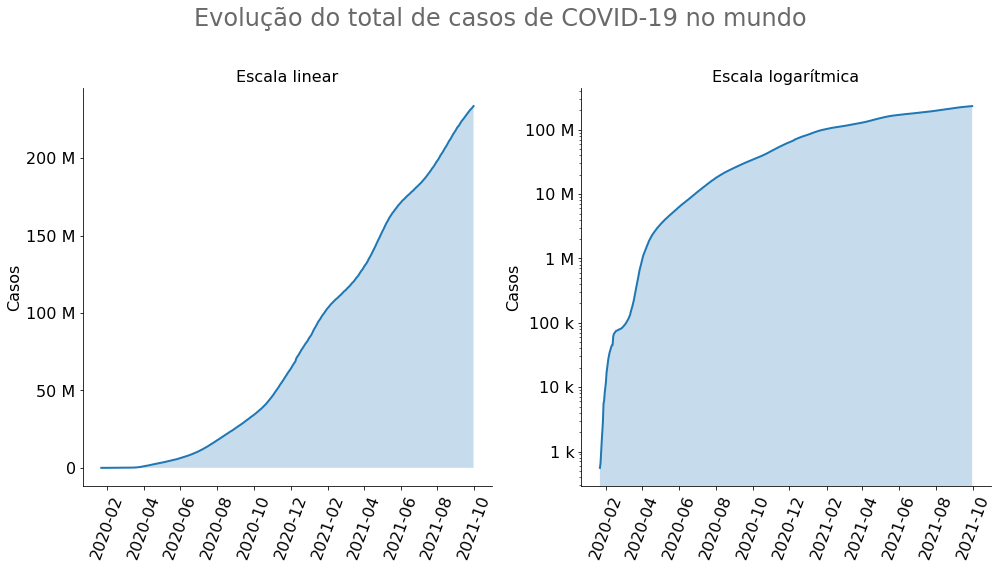

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

x = df.loc[df['location'] == 'World', 'date']
y = df.loc[df['location'] == 'World', 'total_cases']

myFmt = mdates.DateFormatter("%Y-%m")

for ax in (ax1, ax2):
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(myFmt)
    ax.tick_params(axis='x', rotation=70)
    ax.set_ylabel('Casos')
    ax.fill_between(x, y, alpha=0.25)
    
ax1.plot(x, y)
ax1.set_title('Escala linear')
ax1.yaxis.set_major_formatter(EngFormatter())

ax2.plot(x, y)
ax2.set_yscale('log')
ax2.yaxis.set_major_formatter(EngFormatter())
ax2.set_title('Escala logarítmica')

plt.suptitle('Evolução do total de casos de COVID-19 no mundo\n', 
             color='dimgray')

plt.show()

Vemos que, desde o surgimento em meados de janeiro de 2020, foram necessários cerca de 3 meses para atingir 1 milhão de casos e 1 ano para 100 milhões de casos. Lembrando que esses são os casos efetivamente computados devido a testagem ou procura das pessoas pelas redes de saúde. O número real é potencialmente maior tendo em vista que a maioria dos casos é branda ou assintomática, de forma que os indivíduos não procuram as redes de saúde. De qualquer forma, considerando que a população mundial é estimada na ordem de 7,8 bilhões de pessoas, **o número de casos até o momento indica que cerca de 3 % da população mundial já teve a doença**.

Muito se fala das variantes do vírus. A Organização Mundial da Saúde (OMS) em [seu site](https://www.who.int/en/activities/tracking-SARS-CoV-2-variants/) descreve os critérios para considerar uma determinada variante como sendo de interesse ou preocupante. A OMS também esclarece que os nomes são dados um certo tempo depois que as primeiras amostras de cada variante são analisadas, conforme a tabela:

| Variante | Data da primeira amostra | Data do nome |
|:------|:--------|:--------|
| alfa | Setembro/2020 - Reino Unido | Dezembro de 2020 
| beta | Maio/2020 - África do Sul | Dezembro de 2020 
| gama | Novembro/2020 - Brasil | Janeiro de 2021
| delta | Outubro/2020 - Índia | Abril de 2021
| lambda | Dezembro/2020 - Peru | Junho de 2021
| mu | Janeiro/2021 - Colômbia | Agosto de 2021

Neste estudo, optou-se por utilizar a data da primeira amostra nos gráficos, motivo pelo qual a beta aparece antes da alfa. Tal escolha se deve ao fato de a variante já estar se espalhando desde a data de amostra independentemente de ter recebido um nome. Vamos adicionar aos gráficos anteriores linhas indicando as datas de aparecimento de cada variante:

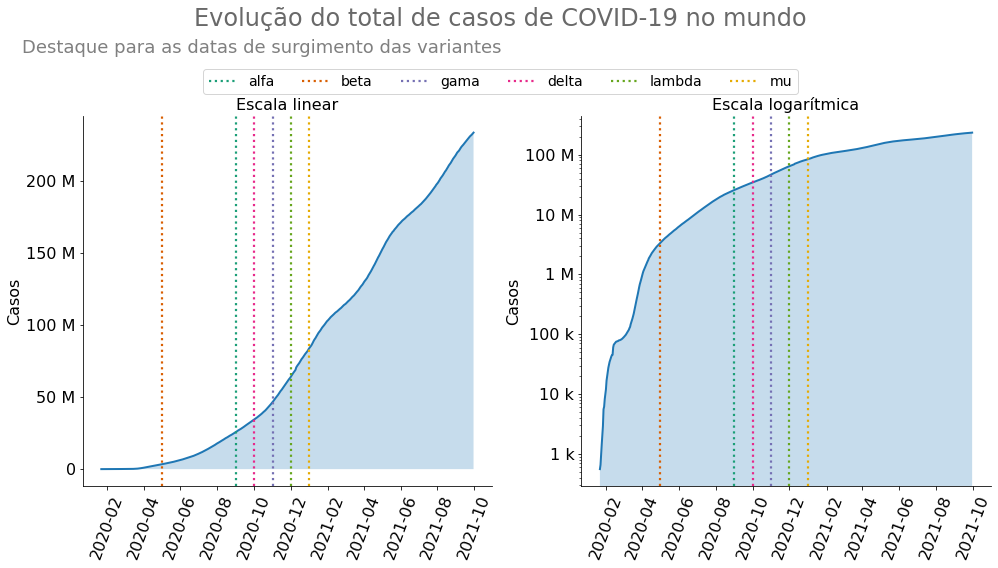

In [11]:
variants = {
    'alfa': '2020-09-01',
    'beta': '2020-05-01',
    'gama': '2020-11-01',
    'delta': '2020-10-01',
    'lambda': '2020-12-01',
    'mu': '2021-01-01',
}

variants = {key: datetime.fromisoformat(value) for (key, value) in variants.items()}

colors = plt.cm.Dark2.colors

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

x = df.loc[df['location'] == 'World', 'date']
y = df.loc[df['location'] == 'World', 'total_cases']

for ax in (ax1, ax2):
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(myFmt)
    ax.tick_params(axis='x', rotation=70)
    ax.set_ylabel('Casos')
    
ax1.plot(x, y)
ax1.fill_between(x, y, alpha=0.25)
ax1.yaxis.set_major_formatter(EngFormatter())
ax1.set_title('Escala linear')

ax2.plot(x, y)
ax2.fill_between(x, y, alpha=0.25)
ax2.set_yscale('log')
ax2.set_title('Escala logarítmica')
ax2.yaxis.set_major_formatter(EngFormatter())

for color, var in zip(colors, variants):
    for ax in (ax1, ax2):
        ax.axvline(x=variants[var], label=var, linestyle='dotted', 
                   linewidth=2.2, color=color)
        
plt.suptitle('Evolução do total de casos de COVID-19 no mundo\n\n', 
             color='dimgray')
plt.gcf().text(0.025, 0.865, 'Destaque para as datas de surgimento das variantes\n', 
               fontsize=18, color='gray')

handles, labels = ax.get_legend_handles_labels()
        
fig.legend(bbox_to_anchor=(0.5, 0.885), loc='upper center', ncol=8,
          handles=handles, labels=labels)
plt.show()

O número de casos teve um acelerado crescimento inicial antes do surgimento da primeira variante (beta) e houve um aumento de 10 vezes entre as datas da variante beta e da variante alfa, um intervalo de 4 meses. O crescimento se torna, então, um mais lento. Nos quatro meses entre as variantes alfa e mu o número de casos cresceu 3 vezes.

#### Principais países

Vamos agora olhar os países com mais casos até setembro de 2021. Primeiro, vamos visualizar nossa base de dados com base na data desejada (30 de setembro de 2021):

In [12]:
df.loc[df['date'] == last_date].sort_values(by="total_cases", ascending=False).head()

iso_code  ... excess_mortality_cumulative_per_million
120481  OWID_WRL  ...                                     NaN
6395    OWID_ASI  ...                                     NaN
37348   OWID_EUR  ...                                     NaN
81388   OWID_NAM  ...                                     NaN
116396       USA  ...                                     NaN

[5 rows x 65 columns]

Vemos que a OWID adicionou entradas para totais parciais (continentes) e o total mundial. Vamos verificar quais entradas começam com `OWID`:

In [13]:
df[df['iso_code'].str.startswith('OWID')]['iso_code'].unique()

array(['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_EUN', 'OWID_INT',
       'OWID_KOS', 'OWID_NAM', 'OWID_CYN', 'OWID_OCE', 'OWID_SAM',
       'OWID_WRL'], dtype=object)

Vamos identificar cada uma dessas entradas:

- `OWID_AFR` = África
- `OWID_ASI` = Ásia
- `OWID_EUR` = Europa
- `OWID_EUN` = União europeia
- `OWID_INT` = Casos [não atribuídos](https://github.com/owid/covid-19-data/issues/127) a algum país 
- `OWID_KOS` = Kosovo (ainda não reconhecido como independente por vários países)
- `OWID_NAM` = América do Norte
- `OWID_CYN` = Chipre do Norte (ainda não reconhecido como independente por vários países)
- `OWID_OCE` = Oceania
- `OWID_SAM` = América do Sul
- `OWID_WRL` = Mundo

Observe que não há América Central, uma divisão comumente feita em alguns estudos. Isto porque a OWID coloca todos os países que usalmente são considerados parte da América Central como parte da América do Norte tendo em vista que, formalmente, [não há um continente América Central](https://www.britannica.com/place/Central-America) tendo em vista a classificação geográfica por placas tectônicas.

Vemos que, além dos consolidados por continente e global, há ainda entradas referentes a territórios não reconhecidos como países e referente a casos não atribuídos a algum país específico. Vamos criar um novo dataframe sem essas entradas:

In [14]:
df_countries_last_date = df[~df['iso_code'].str.startswith('OWID')].loc[df['date'] == last_date].sort_values(by="total_deaths", ascending=False)

##### Totais absolutos

Em um primeiro momento, podemos supor que países com maiores populações apresentem mais casos. Vamos verificar as maiores populações mundiais:

In [15]:
temp = df_countries_last_date.loc[:, ['location', 'population']].sort_values(by="population", ascending=False)[0:10]
with pd.option_context('display.float_format', '{:,.0f}'.format):
    display(HTML(temp.to_html(index=False)))

Agora, vamos organizar uma tabela mostrando os países com mais casos e, também, expressar isto graficamente:

In [16]:
temp = df_countries_last_date.loc[:, ['location', 'population', 'total_cases']].sort_values(by="total_cases", ascending=False)[0:10]
with pd.option_context('display.float_format', '{:,.0f}'.format):
    display(HTML(temp.to_html(index=False)))

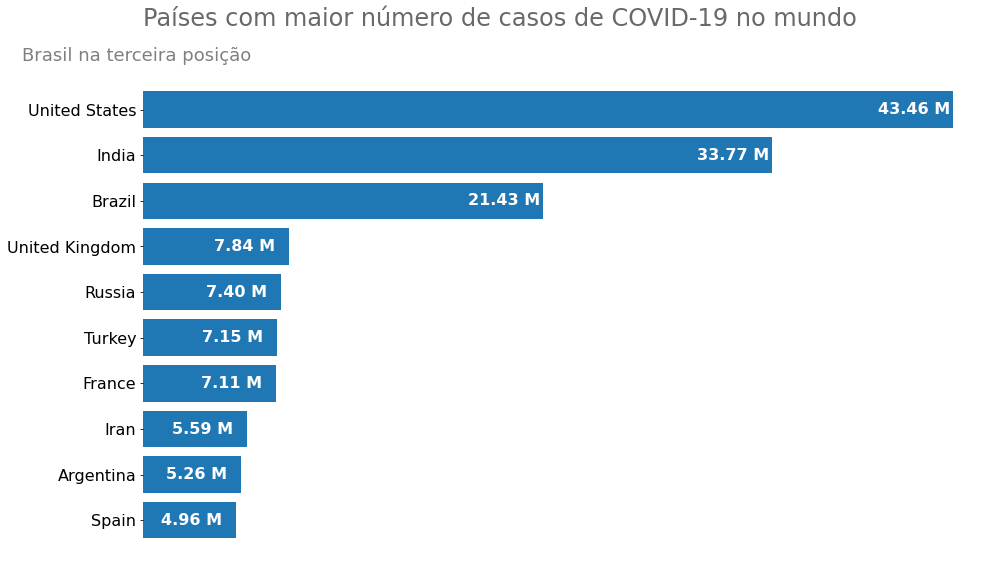

In [17]:
eng_format = EngFormatter(places=2)

fig, ax = plt.subplots()
ax.barh('location', 'total_cases', data=temp)
ax.invert_yaxis()
labels = temp['total_cases'].values
ax.bar_label(ax.containers[0], padding=-75, labels=map(eng_format, labels),
             color='white', fontsize=16, weight='bold')

ax.set_frame_on(False)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticklabels([])
ax.set_xticks([])

plt.suptitle('Países com maior número de casos de COVID-19 no mundo\n', 
             color='dimgray')
plt.gcf().text(0.025, 0.85, 'Brasil na terceira posição\n', 
               fontsize=18, color='gray')
plt.show()


Vemos que 4 países dentre os que apresentam maiores populações no mundo também figuram entre os com mais casos: Estados Unidos, Índia, Brasil e Rússia. Há a ausência da China, mas os dados de lá não são confiáveis tendo em vista o regime ditatorial, sendo que o país até hoje [se nega a fornecer](https://www.forbes.com/sites/jemimamcevoy/2021/07/15/who-chief-china-not-sharing-critical-data-in-covid-origins-probe/?sh=411fe3e47591) dados mais completos sobre a própria origem do vírus.

Outra ausência que chama a atenção é a Indonésia. Novamente, devido a questões políticas, não se pode confiar totalmente nos dados reportados por tal país, visto que o [próprio presidente da Indonésia](https://www.thejakartapost.com/news/2020/03/13/we-dont-want-people-to-panic-jokowi-says-on-lack-of-transparency-about-covid-cases.html) afirmou em dado ponto que não estavam disponibilizando informações para "evitar pânico" na população.

Vemos por esses dois casos que há diversos fatores sociais, econômicos e políticos que podem afetar a análise.  Há países entre as maiores populações que enfrentam questões políticas, econômicas e de saúde complicadas, como Paquistão, Bangladesh e Nigéria, que podem afetar a capacidade de tais países em acompanhar e reportar os casos adequadamente. Inclusive, de acordo com [dados e relatórios das Nações Unidas](https://unstats.un.org/unsd/demographic-social/crvs/#coverage), apenas dois terços dos países do mundo possuem registros de pelo menos 90 % dos nascimentos e óbitos e todos os países citados aparecem nos relatórios como países com dificuldades de registro.

Neste estudo, vamos nos ater ao que é apresentado. Mas é importante notar tais situações. 

Vamos montar uma gráfico interativo para avaliar cada país por continente. Para isso, precisamos de dois novos dataframes, um para dados acumulados para todo o mundo e outro por continente:

In [18]:
df_world = df[df['iso_code'] == 'OWID_WRL']
df_world.head()

iso_code  ... excess_mortality_cumulative_per_million
119864  OWID_WRL  ...                                     NaN
119865  OWID_WRL  ...                                     NaN
119866  OWID_WRL  ...                                     NaN
119867  OWID_WRL  ...                                     NaN
119868  OWID_WRL  ...                                     NaN

[5 rows x 65 columns]

In [19]:
df_continent_last_date = df[(df['iso_code'].isin(['OWID_AFR',
                                                  'OWID_ASI', 
                                                  'OWID_EUR', 
                                                  'OWID_NAM',
                                                  'OWID_OCE',
                                                  'OWID_SAM'])) & (df['date'] == last_date)]
df_continent_last_date

iso_code  ... excess_mortality_cumulative_per_million
1188    OWID_AFR  ...                                     NaN
6395    OWID_ASI  ...                                     NaN
37348   OWID_EUR  ...                                     NaN
81388   OWID_NAM  ...                                     NaN
83450   OWID_OCE  ...                                     NaN
102168  OWID_SAM  ...                                     NaN

[6 rows x 65 columns]

In [20]:
fig = px.treemap(df_countries_last_date.dropna(how='all', subset=['total_cases']), 
                 path=[px.Constant('World'), 'continent','location'], 
                 values='total_cases',
                 color='total_cases', 
                 title='Países com maior número de casos de COVID-19 no mundo',
                 color_continuous_scale='Blues',
                 custom_data=['total_cases'],
                 )

fig.data[0].customdata[-1] = df_world.loc[df_world['date'] == last_date, 'total_cases']
fig.data[0].customdata[-7:-1] = df_continent_last_date[['total_cases']].values

fig.update_traces(hovertemplate='<b>%{label}</b><br>%{customdata:,.2f}')
fig.update_layout(margin = dict(t=80, l=0, r=0, b=10), 
                  coloraxis_colorbar=dict(title=None, thickness=30, len=1),                  
                  title={
                      'text': 'Total de casos de COVID-19 no mundo<br>',
                      'font': {'size': 24, 'color': 'dimgray'},
                      'y':0.95,
                      'x':0.5,
                      'xanchor': 'center',
                      'yanchor': 'top'},
                 annotations= [{
                     'text': "Casos por continente e país. Clique em um continente para detalhes",
                     'font': {
                         'size': 18,
                         'color': 'gray',
                     },
                     'showarrow': False,
                     'align': 'left',
                     'x': 0.0,
                     'y': 1.1,
                     'xanchor': 'left',
                     'yanchor': 'top',
                 }])

fig.show()

No gráfico, temos uma ideia da proporção do total de casos de cada país frente aos demais de seu continente e do mundo.

Mas será que essa é a melhor métrica para avaliar comparativamente a situação de cada país?

##### Totais por milhão de habitantes

Uma análise do total absoluto de casos não necessariamente reflete a realidade de cada país. Afinal, como já dito, países com maiores populações tendem a ter maior número de casos. No entanto, isso não significa que países com populações pequenas não possam estar em situação pior. Afinal, podem, relativamente ao seu número de habitantes, estar com elevado número de casos. E regiões com maiores densidades populacionais podem favorecer uma maior taxa de transmissão (hipótese que será estudada mais adiante).

Vamos, então, verificar os países com mais casos por milhão de habitantes:

In [21]:
temp = df_countries_last_date.loc[:, ['location', 'continent', 'total_cases_per_million']].sort_values(by="total_cases_per_million", ascending=False)[0:10]
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(HTML(temp.to_html(index=False)))

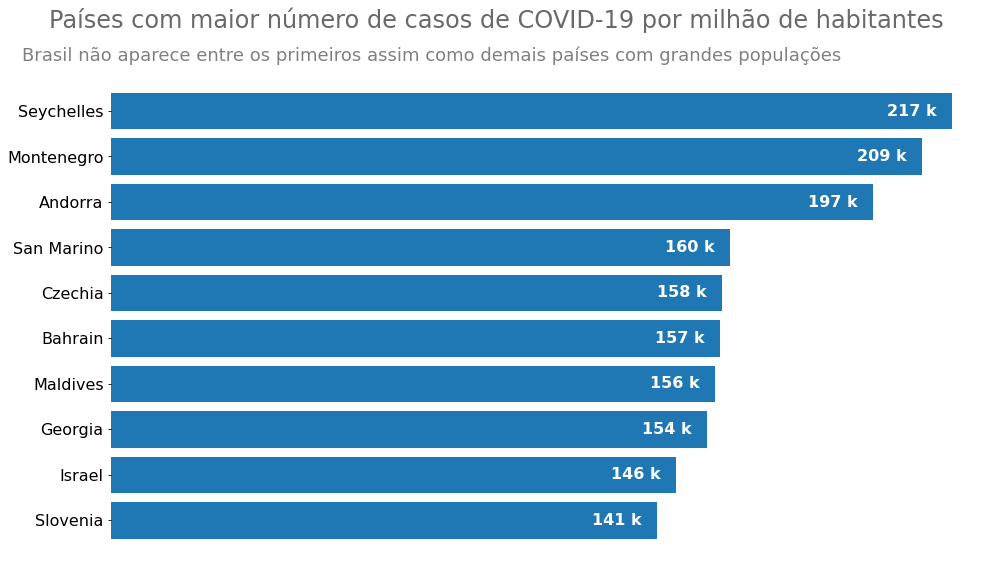

In [22]:
eng_format_k = EngFormatter(places=0)

fig, ax = plt.subplots()
ax.barh('location', 'total_cases_per_million', data=temp)
ax.invert_yaxis()
labels = temp['total_cases_per_million'].values
ax.bar_label(ax.containers[0], padding=-65, labels=map(eng_format_k, labels),
             color='white', fontsize=16, weight='bold')

ax.set_frame_on(False)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticklabels([])
ax.set_xticks([])

plt.suptitle('Países com maior número de casos de COVID-19 por milhão de habitantes \n', 
             color='dimgray')
plt.gcf().text(0.025, 0.85, 'Brasil não aparece entre os primeiros assim como demais países com grandes populações\n', 
               fontsize=18, color='gray')

plt.show()

Percebemos uma grande mudança, aparecendo pequenos países. Em primeiro temos Seicheles, um país insular do continente africano, tendo um grande fluxo de turistas. Já em [maio de 2021](https://www.bbc.com/portuguese/geral-57207566) notícias surgiam mostrando o aumento de casos no país apesar de ter sido o mais vacinado do mundo (proporcionalmente à sua população) na época.

Inclusive, vemos no gráfico outros países que atingiram rapidamente elevadas taxas de vacinação e, mesmo assim, tiveram picos de novos casos como, por exemplo, [Israel](https://www.npr.org/sections/goatsandsoda/2021/08/20/1029628471/highly-vaccinated-israel-is-seeing-a-dramatic-surge-in-new-covid-cases-heres-why). Veremos dados de vacinação mais adiante.

Vamos criar um gráfico interativo mostrando cada país por continente:

In [23]:
fig = px.treemap(df_countries_last_date.dropna(how='all', 
                                               subset=['total_cases_per_million']), 
                 path=[px.Constant('World'), 'continent','location'], 
                 values='total_cases_per_million',
                 color='total_cases_per_million', 
                 color_continuous_scale='Blues',
                 custom_data=['total_cases_per_million'],                 
                 )

fig.data[0].customdata[-1] = df_world.loc[df_world['date'] == last_date, 'total_cases_per_million']
fig.data[0].customdata[-7:-1] = df_continent_last_date[['total_cases_per_million']].values

fig.update_traces(hovertemplate='<b>%{label}</b><br>%{customdata:,.2f}')
fig.update_layout(margin = dict(t=80, l=0, r=0, b=10), 
                  coloraxis_colorbar=dict(title=None, thickness=30, len=1),                  
                  title={
                      'text': 'Total de casos por milhão de COVID-19<br>',
                      'font': {'size': 24, 'color': 'dimgray'},
                      'y':0.95,
                      'x':0.5,
                      'xanchor': 'center',
                      'yanchor': 'top'},
                 annotations= [{
                     'text': "Casos por continente e país. Clique em um continente para detalhes",
                     'font': {
                         'size': 18,
                         'color': 'gray',
                     },
                     'showarrow': False,
                     'align': 'left',
                     'x': 0.0,
                     'y': 1.1,
                     'xanchor': 'left',
                     'yanchor': 'top',
                 }])

fig.show()

Veja como a análise proporcional muda significativamente o perfil do gráfico. Todos os países que apareciam como líderes em totais absolutos não figuram entre os que possuem mais casos por milhão de habitantes, com exceção dos Estados Unidos. Na Europa, vemos uma maior participação de países do leste europeu que, inclusive, [parece estar entrando em uma nova onda](https://edition.cnn.com/2021/10/25/uk/europe-covid-second-pandemic-winter-intl-gbr/index.html). Na América do Sul, vemos que o Brasil se encontra em terceiro, atrás de Argentina e Uruguai, países que [foram considerados modelos](https://www.nexojornal.com.br/expresso/2021/04/15/As-respostas-de-Argentina-e-Uruguai-aos-recordes-de-covid0) em diversos estágios da pandemia com suas medidas restritivas e lockdowns.

Vamos construir uma mapa interativo mostrando a evolução do total de casos por milhão em cada país. Para isso, vamos construir dois novos dataframes: um para dados apenas de países; outro para consolidar mensalmente esses dados. A consolidação por mês é apenas para deixar a animação do mapa mais rápida, se fosse evolução diária seria uma animação bem demorada.

In [24]:
df_countries = df[~df['iso_code'].str.startswith('OWID')]
df_countries.head()

iso_code continent  ... excess_mortality excess_mortality_cumulative_per_million
0      AFG      Asia  ...              NaN                                     NaN
1      AFG      Asia  ...              NaN                                     NaN
2      AFG      Asia  ...              NaN                                     NaN
3      AFG      Asia  ...              NaN                                     NaN
4      AFG      Asia  ...              NaN                                     NaN

[5 rows x 65 columns]

In [25]:
df_countries_monthly = df_countries.set_index('date').sort_index()
df_countries_monthly = df_countries_monthly.loc[df_countries_monthly.index <= last_date]
df_countries_monthly = df_countries_monthly.dropna(how='any', subset=['total_cases', 
                                                                      'total_deaths', 
                                                                      'total_cases_per_million',
                                                                      'total_deaths_per_million'])
df_countries_monthly = df_countries_monthly.groupby([df_countries_monthly.index.year, 
                                                     df_countries_monthly.index.month,                                                     
                                                     df_countries_monthly['iso_code'],
                                                     ]).tail(1)

df_countries_monthly.head()

iso_code  ... excess_mortality_cumulative_per_million
date                 ...                                        
2020-01-31      CHN  ...                                     NaN
2020-02-29      HKG  ...                             -122.630018
2020-02-29      JPN  ...                             -105.376566
2020-02-29      ITA  ...                                     NaN
2020-02-29      IRN  ...                                     NaN

[5 rows x 64 columns]

In [26]:
fig = px.choropleth(df_countries_monthly, locations="iso_code",
                    color='total_cases_per_million',
                    hover_name="location",
                    color_continuous_scale=px.colors.sequential.Blues,
                    width=900,
                    height=600,
                    animation_frame=df_countries_monthly.index.astype(str),
                    animation_group='iso_code'
                    )

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        resolution=110
    ),
    margin = dict(t=80, l=0, r=0, b=0), 
    coloraxis_colorbar=dict(title='Casos / milhão', thickness=30, len=1),
    title={
        'text': 'Evolução do total de casos por milhão de COVID-19<br>',
        'font': {'size': 24, 'color': 'dimgray'},
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    annotations= [{
        'text': "Casos por milhão para cada país entre 2020 e setembro de 2021. Clique na seta para iniciar",
        'font': {
            'size': 18,
            'color': 'gray',
        },
        'showarrow': False,
        'align': 'left',
        'x': 0.0,
        'y': 1.1,
        'xanchor': 'left',
        'yanchor': 'top',
    }])

fig.show()

Vemos no mapa que apenas alguns países da África apresentaram significativa evolução no número de casos. Como já escrito anteriormente, provavelmente isso está relacionado com as precárias condições de tais países em reportar adequadamente casos e mesmo realizar testes. No entanto, como será mostrado adiante, o perfil mais jovem da população também pode ter alguma relação, já que a doença é mais branda em jovens, o que pode fazer com que menos pessoas busquem tratamento, ficando de fora dos números oficiais. Há [alguns estudos](https://www.sciencedirect.com/science/article/pii/S120197122032172X) que sugerem tal explicação, além de outras.

Vemos na Oceania poucos casos na Austrália e na Nova Zelândia. Os dois países adotaram políticas altamente restritivas e questionáveis buscando zerar novos casos e se [veem forçados a afrouxar](https://www.bloomberg.com/news/articles/2021-08-22/n-z-says-delta-raises-questions-about-its-covid-zero-approach) tais políticas por não terem tido o efeito desejado e estarem quebrando suas economias.

#### Idade e riqueza

Vamos verificar se o número de casos possui alguma relação com a renda per capita do país ou a idade da população.

Comecemos verificando os países com maior PIB per capita:

In [27]:
temp = df_countries_last_date.loc[:, ['location', 'total_cases', 
                                      'total_cases_per_million',
                                      'gdp_per_capita', 'continent']].sort_values(by="gdp_per_capita",
                                                                                  ascending=False)[0:10]

with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(HTML(temp.to_html(index=False)))

Como era de se esperar, vemos apenas países da Ásia e Europa. Vamos criar um gráfico interativo buscando avaliar como os casos variam com a expectativa de vida e o PIB per capita:

In [28]:
fig = px.scatter(df_countries_last_date.dropna(how='all', 
                                               subset=['gdp_per_capita']), 
                 x = 'life_expectancy', 
                 y = 'total_cases_per_million', 
                 size='gdp_per_capita', 
                 color ='continent', hover_name='location', 
                 size_max = 40, 
                 width = 900, 
                 )

fig.update_layout(
    margin = dict(t=80, l=0, r=200, b=10), 
    title={
        'text': 'Total de casos de COVID-19 por milhão e expectativa de vida<br>',
        'font': {'size': 24, 'color': 'dimgray'},
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis={
        'title': 'Expectativa de vida',        
    },
    yaxis={
        'title': 'Total de casos por milhão',        
    },
    legend={
        'title': ''
    },
    annotations=[{
        'text': '<b>Tamanho</b>: PIB per capita. <b>Cor</b>: continente. Passe o mouse para detalhes',
        'font': {
            'size': 18,
            'color': 'gray',
        },
        'showarrow': False,
        'align': 'left',
        'x': 0.0,
        'y': 1.1,
        'xanchor': 'left',
        'yanchor': 'top',
        'xref': 'paper', 
        'yref': 'paper',
    }]
)

fig.show()

No gráfico vemos claramente que os países do continente africano possuem, em sua maioria, menores expectativas de vida e menores PIB per capita (menores círculos no gráfico). No entanto, Seicheles, país africano com maior PIB per capita e uma das maiores expectativas de vida do continente, lidera os dados mundiais em total de casos por milhão.

Vemos uma tendência similar em outros continentes, maiores expectativas de vida e PIB per capita com mais casos. Obviamente que países mais ricos tendem a ter populações mais velhas ou, melhor dizendo, maior parcela da população com idade avançada e, como a doença afeta mais pessoas idosas, é de se esperar maior notificação de casos nesses países. No entanto, cabe destacar que há notáveis exceções à essa tendência como, por exemplo, o Japão.

Uma maior expectativa de vida, no entanto, não necessariamente significa que a população atual possui mais idosos que jovens. Assim, vamos repetir o gráfico substituindo o eixo de expectativa de vida por mediana de idade:

In [29]:
fig = px.scatter(df_countries_last_date.dropna(how='all', 
                                               subset=['gdp_per_capita']), 
                 x='median_age', 
                 y='total_cases_per_million', 
                 size='gdp_per_capita', 
                 color='continent', 
                 hover_name="location", 
                 size_max=40, 
                 width=900, 
                 )

fig.update_layout(
    margin = dict(t=80, l=0, r=200, b=10), 
    title={
        'text': 'Total de casos de COVID-19 por milhão e mediana de idade da população<br>',
        'font': {'size': 24, 'color': 'dimgray'},
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis={
        'title': 'Mediana de idade da população',        
    },
    yaxis={
        'title': 'Total de casos por milhão',        
    },
    legend={
        'title': ''
    },
    annotations=[{
        'text': '<b>Tamanho</b>: PIB per capita. <b>Cor</b>: continente',
        'font': {
            'size': 18,
            'color': 'gray',
        },
        'showarrow': False,
        'align': 'left',
        'x': 0.0,
        'y': 1.1,
        'xanchor': 'left',
        'yanchor': 'top',
        'xref': 'paper', 
        'yref': 'paper',
    }]
)

fig.show()

Vemos a mesma tendência: população mais velha, mais casos notificados.

### Novos casos

Até o momento focamos em avaliar a evolução do total de casos no mundo e em cada país. Agora, vamos verificar a evolução de novos casos, à medida que foram sendo reportados. Assim, podemos verificar em quais momentos houve maior notificação, as popularmente chamadas "ondas" de casos.

A base de dados apresenta as entradas na forma de dados diários e na forma de média móvel de 7 dias. A média móvel ajuda a visualizar melhor a tendência dos dados, visto que há grande variação dos dados diários. Vamos começar com os casos em todo mundo:

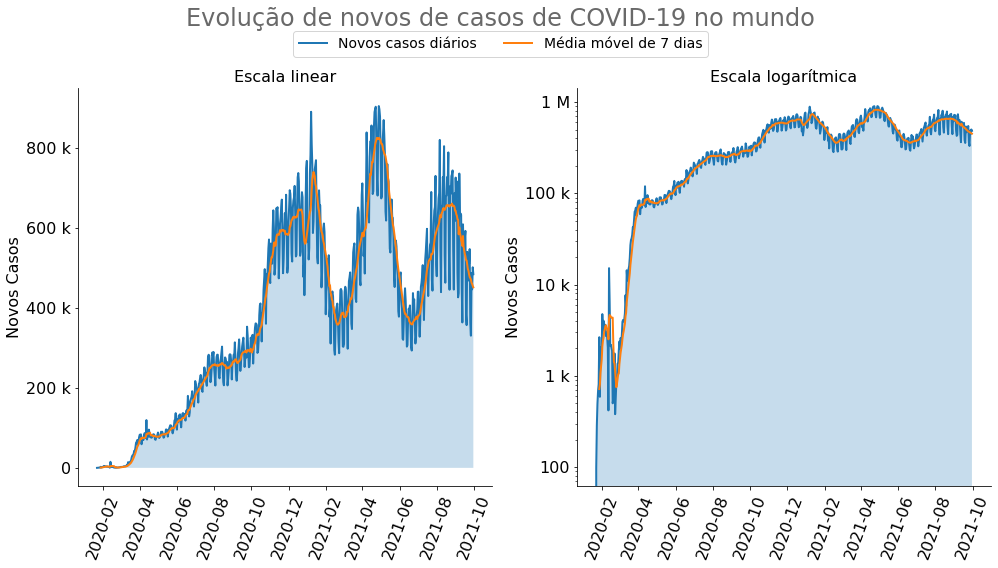

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

x = df.loc[df['location'] == 'World', 'date']
y = df.loc[df['location'] == 'World', 'new_cases']
y2 = df.loc[df['location'] == 'World', 'new_cases_smoothed']

for ax in (ax1, ax2):
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(myFmt)
    ax.tick_params(axis='x', rotation=70)
    ax.set_ylabel('Novos Casos')
    ax.fill_between(x, y, alpha=0.25)

ax1.plot(x, y, label='Novos casos diários')
ax1.plot(x, y2, label='Média móvel de 7 dias')
ax1.yaxis.set_major_formatter(EngFormatter())
ax1.set_title('Escala linear')

ax2.plot(x, y, label='Novos casos diários')
ax2.plot(x, y2, label='Média móvel de 7 dias')
ax2.set_yscale('log')
ax2.yaxis.set_major_formatter(EngFormatter())
ax2.set_title('Escala logarítmica')

plt.suptitle('Evolução de novos de casos de COVID-19 no mundo\n', 
             color='dimgray')

handles, labels = ax1.get_legend_handles_labels()

fig.legend(bbox_to_anchor=(0.5, 0.95), loc='upper center', ncol=8,
          handles=handles, labels=labels)
plt.show()

Vemos que está surgindo um padrão de aceleração de casos e máximos. Em 2020 vimos três grandes saltos em novos casos, por volta de março/abril, por volta de junho/julho e por volta de outubro/novembro. Em 2021, já vimos novamente saltos em abril e julho, ficando a expectativa de novo crescimento de casos na parte final do ano.

Podemos verificar se há algum indício de relação entre novos casos e as variantes:

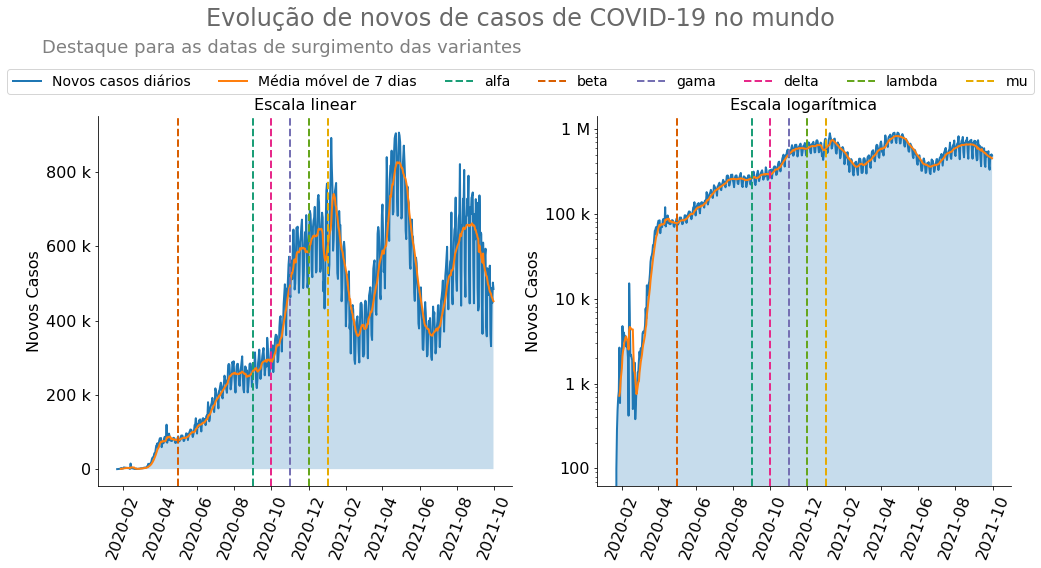

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

x = df.loc[df['location'] == 'World', 'date']
y = df.loc[df['location'] == 'World', 'new_cases']
y2 = df.loc[df['location'] == 'World', 'new_cases_smoothed']

for ax in (ax1, ax2):
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(myFmt)
    ax.tick_params(axis='x', rotation=70)
    ax.set_ylabel('Novos Casos')
    ax.fill_between(x, y, alpha=0.25)

ax1.plot(x, y, label='Novos casos diários')
ax1.plot(x, y2, label='Média móvel de 7 dias')
ax1.yaxis.set_major_formatter(EngFormatter())
ax1.set_title('Escala linear')

ax2.plot(x, y, label='Novos casos diários')
ax2.plot(x, y2, label='Média móvel de 7 dias')
ax2.set_yscale('log')
ax2.yaxis.set_major_formatter(EngFormatter())
ax2.set_title('Escala logarítmica')

for color, var in zip(colors, variants):
    for ax in (ax1, ax2):
        ax.axvline(x=variants[var], label=var, linestyle='--', color=color)


plt.suptitle('Evolução de novos de casos de COVID-19 no mundo\n\n', 
             color='dimgray')
plt.gcf().text(0.025, 0.865, 'Destaque para as datas de surgimento das variantes\n', 
               fontsize=18, color='gray')

handles, labels = ax1.get_legend_handles_labels()
        
fig.legend(bbox_to_anchor=(0.5, 0.885), loc='upper center', ncol=8,
          handles=handles, labels=labels)
plt.show()

Em 2020, vemos que o aumento de casos entre junho e julho ocorre após o surgimento da variante beta. De forma similar, após o surgimento da variante delta, ocorre o aumento significativo de casos entre outubro e novembro. Isso corrobora as afirmações veiculadas frequentemente na mídia que tal variante, assim como as que surgiram posteriormente, são mais transmissíveis.

Agora, sabemos que em estações mais frias usualmente há [mais casos de resfriados e gripes](https://www.cdc.gov/flu/about/season/flu-season.htm). Será que há alguma relação entre inverno e casos de COVID-19? Vejamos:

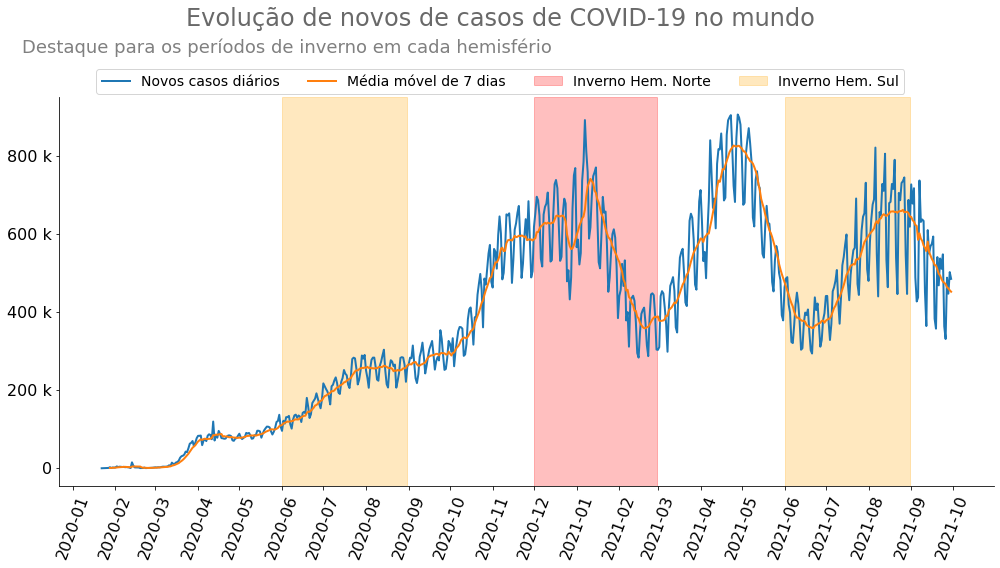

In [32]:
fig, ax1 = plt.subplots()

x = df.loc[df['location'] == 'World', 'date']
y = df.loc[df['location'] == 'World', 'new_cases']
y2 = df.loc[df['location'] == 'World', 'new_cases_smoothed']

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(myFmt)
ax1.tick_params(axis='x', rotation=70)

ax1.plot(x, y, label='Novos casos diários')
ax1.plot(x, y2, label='Média móvel de 7 dias')
# ax1.fill_between(x, y2, alpha=0.25)
ax1.yaxis.set_major_formatter(EngFormatter())

ax1.axvspan(*mdates.datestr2num(['2020-12-1', '2021-02-28']), color='red', alpha=0.25, label='Inverno Hem. Norte')
ax1.axvspan(*mdates.datestr2num(['2020-06-1', '2020-08-31']), color='orange', alpha=0.25, label='Inverno Hem. Sul')
ax1.axvspan(*mdates.datestr2num(['2021-06-1', '2021-08-31']), color='orange', alpha=0.25)

plt.suptitle('Evolução de novos de casos de COVID-19 no mundo\n\n', 
             color='dimgray')
plt.gcf().text(0.025, 0.865, 'Destaque para os períodos de inverno em cada hemisfério\n', 
               fontsize=18, color='gray')

handles, labels = ax1.get_legend_handles_labels()
        
fig.legend(bbox_to_anchor=(0.5, 0.885), loc='upper center', ncol=8,
          handles=handles, labels=labels)
plt.show()

Vemos que há uma possível relação, repare os períodos entre junho e setembro de ambos os anos e o período entre dezembro de 2020 e março de 2021. No entanto, o máximo entre abril e maio de 2021 não encaixa muito bem nessa explicação. 

Vamos comparar os dados consolidados mundialmente com os dados individuais dos países que vimos anteriormente possuir mais casos:

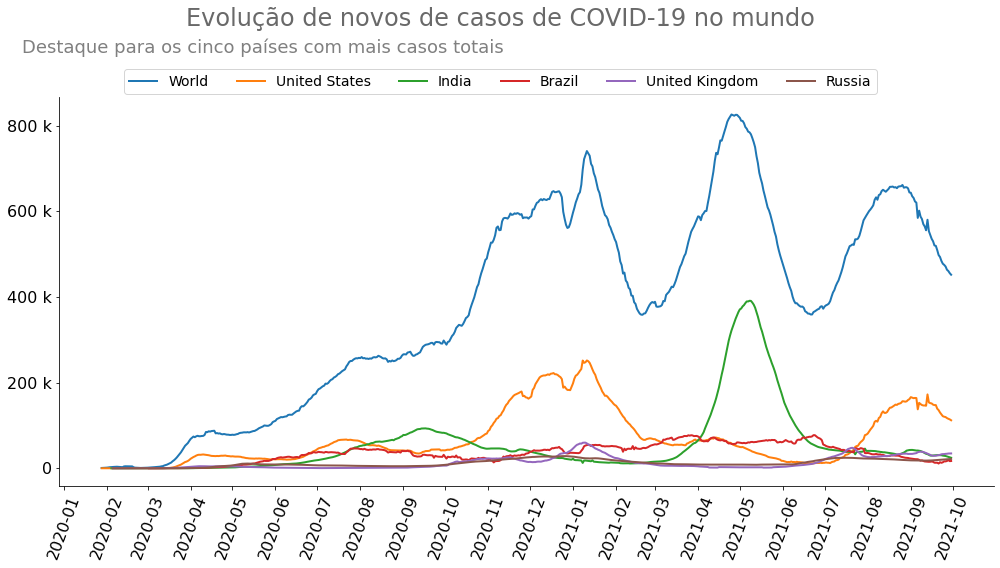

In [33]:
fig, ax = plt.subplots()

x = df.loc[df['location'] == 'World', 'date']
y = df.loc[df['location'] == 'World', 'new_cases_smoothed']

x1 = df.loc[df['location'] == 'Brazil', 'date']
y1 = df.loc[df['location'] == 'Brazil', 'new_cases_smoothed']

x2 = df.loc[df['location'] == 'India', 'date']
y2 = df.loc[df['location'] == 'India', 'new_cases_smoothed']

x3 = df.loc[df['location'] == 'United States', 'date']
y3 = df.loc[df['location'] == 'United States', 'new_cases_smoothed']

x4 = df.loc[df['location'] == 'United Kingdom', 'date']
y4 = df.loc[df['location'] == 'United Kingdom', 'new_cases_smoothed']

x5 = df.loc[df['location'] == 'Russia', 'date']
y5 = df.loc[df['location'] == 'Russia', 'new_cases_smoothed']


ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(myFmt)
ax.tick_params(axis='x', rotation=70)
ax.yaxis.set_major_formatter(EngFormatter())

ax.plot(x, y, label='World')
ax.plot(x3, y3, label='United States')
ax.plot(x2, y2, label='India')
ax.plot(x1, y1, label='Brazil')
ax.plot(x4, y4, label='United Kingdom')
ax.plot(x5, y5, label='Russia')

plt.suptitle('Evolução de novos de casos de COVID-19 no mundo\n\n', 
             color='dimgray')
plt.gcf().text(0.025, 0.865, 'Destaque para os cinco países com mais casos totais\n', 
               fontsize=18, color='gray')

handles, labels = ax.get_legend_handles_labels()
        
fig.legend(bbox_to_anchor=(0.5, 0.885), loc='upper center', ncol=8,
          handles=handles, labels=labels)
plt.show()

Aqui vemos mais claramente como o pico entre abril e maio de 2021 possui grande influência da Índia e talvez seja decorrente de algo específico deste país. Na época, [notícias](https://www.nature.com/articles/d41586-021-01059-y) também demonstravam uma certa dúvida nos motivos que levaram a Índia a ter esse surto de casos, suspeitando-se de novas variantes ou de espalhamento para os grandes centros urbanos.

Vamos verificar o perfil de cada continente, ainda comparando com o acumulado mundial:

In [34]:
df_continent = df[(df['iso_code'].isin(['OWID_AFR',
                                        'OWID_ASI', 
                                        'OWID_EUR', 
                                        'OWID_NAM',
                                        'OWID_OCE',
                                        'OWID_SAM']))]
df_continent.head()

iso_code  ... excess_mortality_cumulative_per_million
593  OWID_AFR  ...                                     NaN
594  OWID_AFR  ...                                     NaN
595  OWID_AFR  ...                                     NaN
596  OWID_AFR  ...                                     NaN
597  OWID_AFR  ...                                     NaN

[5 rows x 65 columns]

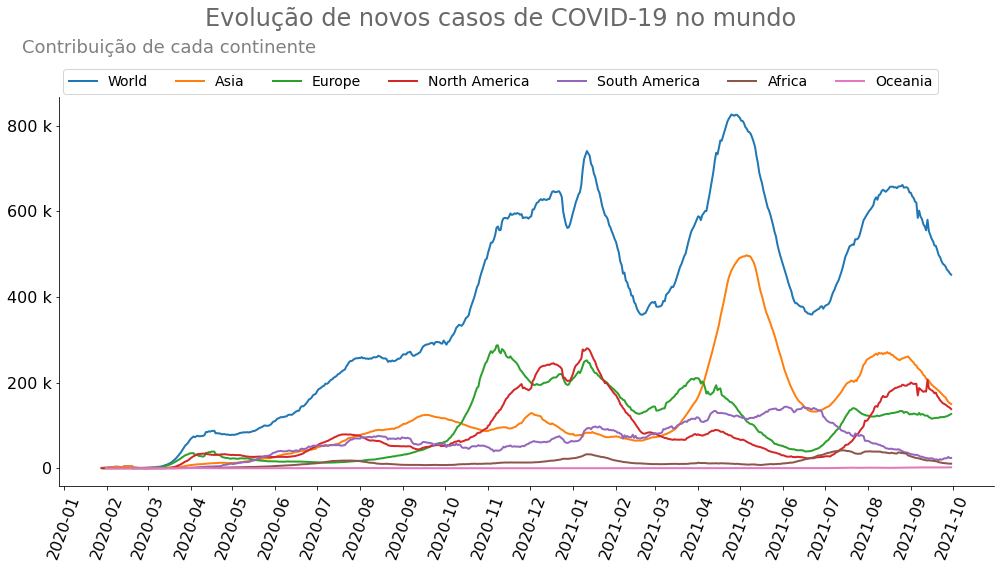

In [35]:
fig, ax = plt.subplots()

x = df.loc[df['location'] == 'World', 'date']
y = df.loc[df['location'] == 'World', 'new_cases_smoothed']

x1 = df_continent.loc[df_continent['location'] == 'Africa', 'date']
y1 = df_continent.loc[df_continent['location'] == 'Africa', 'new_cases_smoothed']

x2 = df_continent.loc[df_continent['location'] == 'Europe', 'date']
y2 = df_continent.loc[df_continent['location'] == 'Europe', 'new_cases_smoothed']

x3 = df_continent.loc[df_continent['location'] == 'Oceania', 'date']
y3 = df_continent.loc[df_continent['location'] == 'Oceania', 'new_cases_smoothed']

x4 = df_continent.loc[df_continent['location'] == 'Asia', 'date']
y4 = df_continent.loc[df_continent['location'] == 'Asia', 'new_cases_smoothed']

x5 = df_continent.loc[df_continent['location'] == 'North America', 'date']
y5 = df_continent.loc[df_continent['location'] == 'North America', 'new_cases_smoothed']

x6 = df_continent.loc[df_continent['location'] == 'South America', 'date']
y6 = df_continent.loc[df_continent['location'] == 'South America', 'new_cases_smoothed']

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(myFmt)
ax.tick_params(axis='x', rotation=70)
ax.yaxis.set_major_formatter(EngFormatter())

ax.plot(x, y, label='World')
ax.plot(x4, y4, label='Asia')
ax.plot(x2, y2, label='Europe')
ax.plot(x5, y5, label='North America')
ax.plot(x6, y6, label='South America')
ax.plot(x1, y1, label='Africa')
ax.plot(x3, y3, label='Oceania')

plt.suptitle('Evolução de novos casos de COVID-19 no mundo\n\n', 
             color='dimgray')
plt.gcf().text(0.025, 0.865, 'Contribuição de cada continente\n', 
               fontsize=18, color='gray')

handles, labels = ax.get_legend_handles_labels()
        
fig.legend(bbox_to_anchor=(0.5, 0.885), loc='upper center', ncol=8,
          handles=handles, labels=labels)
plt.show()

Aqui percebemos que o perfil da Ásia não acompanha fielmente o da Europa e o da América do Norte, mesmo estando todos estes continentes no mesmo hemisfério. Mas, como vimos, há grande efeito dos números da Índia no continente asiático e há diversos países suspeitos de subnotificação no mesmo continente, de forma que a comparação pode ser prejudicada.

Quanto as continentes do hemisfério sul, não se pode afirmar claramente se há alguma tendência conjunta. 

A dificuldade em encontrar padrões entre continentes é resultado da grande diferença de população entre os mesmos, além da posição geográfica e de possíveis subnotificações já citadas. Não necessariamente pertencer ao mesmo hemisfério significa ter estações do ano similares. Além de haver diversos fatores relacionados ao microclima de cada país/região e, obviamente, aspectos políticos e econômicos muito distinos. Apenas de forma ilustrativa, vejamos a população de cada continente:

In [36]:
temp = df_continent_last_date.loc[:, ['location', 'population']].sort_values(by='population')
with pd.option_context('display.float_format', '{:,.0f}'.format):
    display(HTML(temp.to_html(index=False)))

Já vimos que aparentemente há um caráter sazonal nos casos de COVID-19. Vamos criar um mapa que apresente esse perfil para cada país:

In [37]:
fig = px.choropleth(df_countries_monthly, locations="iso_code",
                    color='new_cases',
                    hover_name="location",
                    color_continuous_scale=px.colors.sequential.Blues,
                    width=900,
                    height=600,
                    animation_frame=df_countries_monthly.index.astype(str),
                    animation_group='iso_code'
                    )

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        resolution=110
    ),
    margin = dict(t=80, l=0, r=0, b=0), 
    coloraxis_colorbar=dict(title='Novos casos', thickness=30, len=1),
    title={
        'text': 'Evolução de novos casos de COVID-19<br>',
        'font': {'size': 24, 'color': 'dimgray'},
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    annotations= [{
        'text': "Sazonalidade dos novos casos. Compare, por exemplo, EUA e Brasil",
        'font': {
            'size': 18,
            'color': 'gray',
        },
        'showarrow': False,
        'align': 'left',
        'x': 0.0,
        'y': 1.1,
        'xanchor': 'left',
        'yanchor': 'top',
    }])

fig.show()

Observe como as cores oscilam para os países enquanto o tempo passa, e como as oscilações não são sincronizadas. Compare, por exemplo, os Estados Unidos e o Brasil para perceber essa falta de sincronia.

Assim como já discutivo para o total de casos, talvez seja mais elucidativo comparar os novos casos por milhão de habitantes, para diminuir eventuais efeitos de países com grandes populações:

In [38]:
fig = px.choropleth(df_countries_monthly, locations="iso_code",
                    color='new_cases_per_million',
                    hover_name="location",
                    color_continuous_scale=px.colors.sequential.Blues,
                    width=900,
                    height=600,
                    animation_frame=df_countries_monthly.index.astype(str),
                    animation_group='iso_code'
                    )

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        resolution=110
    ),
    margin = dict(t=80, l=0, r=0, b=0), 
    coloraxis_colorbar=dict(title='Novos casos / milhão', thickness=30, len=1),
    title={
        'text': 'Evolução de novos casos por milhão de COVID-19<br>',
        'font': {'size': 24, 'color': 'dimgray'},
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    annotations= [{
        'text': "Sazonalidade dos novos casos. Compare, por exemplo, EUA e Brasil",
        'font': {
            'size': 18,
            'color': 'gray',
        },
        'showarrow': False,
        'align': 'left',
        'x': 0.0,
        'y': 1.1,
        'xanchor': 'left',
        'yanchor': 'top',
    }])

fig.show()

Agora, será que há alguma forma de medir a velocidade de transmissão da doença?

### Taxa efetiva de reprodução (R)

A taxa efetiva de reprodução (R) é o número médio de pessoas infectadas em determinado momento por um indivíduo infectado introduzido em uma população *parcialmente imune*. Atenção ao "parcialmente imune", pois no início da pandemia muito se falava do R<sub>0</sub>, que é um conceito análogo mas para uma população completamente suscetível, ou seja, sem indivíduos imunizados seja por contágio prévio ou por vacinação.

A [interpretação](https://www.dw.com/pt-br/o-que-%C3%A9-o-n%C3%BAmero-de-reprodu%C3%A7%C3%A3o-r/a-53397119) do valor calculado de R é simples:

- R > 1: o número de casos da doença está aumentando. Epidemia 
- R = 1: cada infectado causa uma nova infecção. Endemia
- R < 1: cada vez menos indivíduos se infectam e o número dos contágios retrocede.

Vamos verificar se podemos visualizar alguma relação entre mudanças no valor de R e as diversas variantes:

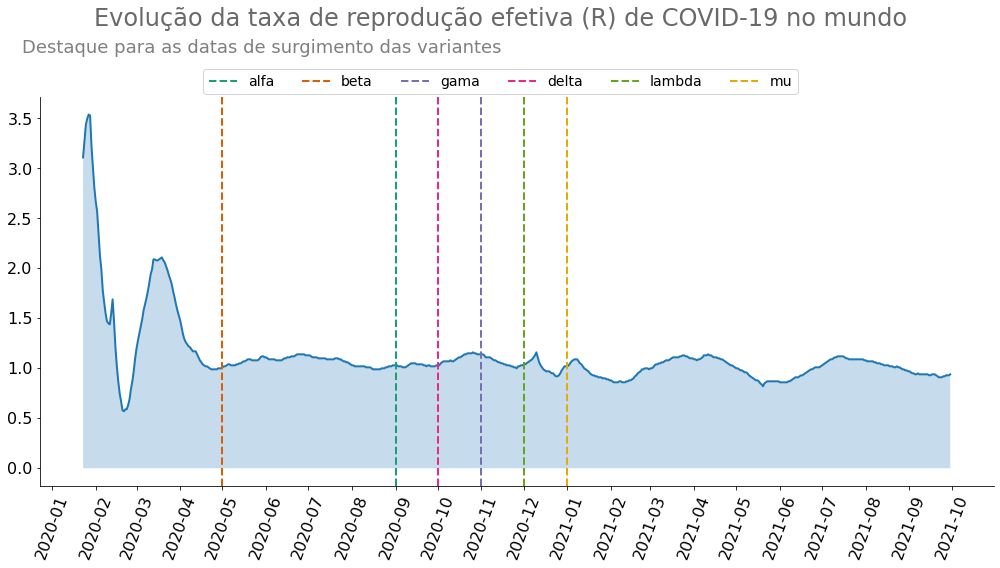

In [39]:
fig, ax = plt.subplots()

x = df.loc[df['location'] == 'World', 'date']
y = df.loc[df['location'] == 'World', 'reproduction_rate']

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(myFmt)
ax.tick_params(axis='x', rotation=70)

ax.plot(x, y)
ax.fill_between(x, y, alpha=0.25)

for color, var in zip(colors, variants):
    ax.axvline(x=variants[var], label=var, linestyle='--', color=color)
    
plt.suptitle('Evolução da taxa de reprodução efetiva (R) de COVID-19 no mundo\n\n', 
             color='dimgray')
plt.gcf().text(0.025, 0.865, 'Destaque para as datas de surgimento das variantes\n', 
               fontsize=18, color='gray')

handles, labels = ax.get_legend_handles_labels()
        
fig.legend(bbox_to_anchor=(0.5, 0.885), loc='upper center', ncol=8,
          handles=handles, labels=labels)
plt.show()

Valores elevados aparecem apenas no início do período. É possível perceber leves aumentos coincidentes com os períodos de máximos de novos casos discutidos anteriormente. Como se trata dos valores de todo o mundo, a curva pode estar sendo balanceada entre países com taxas elevadas e países com taxas baixas. Vamos refazer o gráfico com os dados dos cinco países com mais casos:

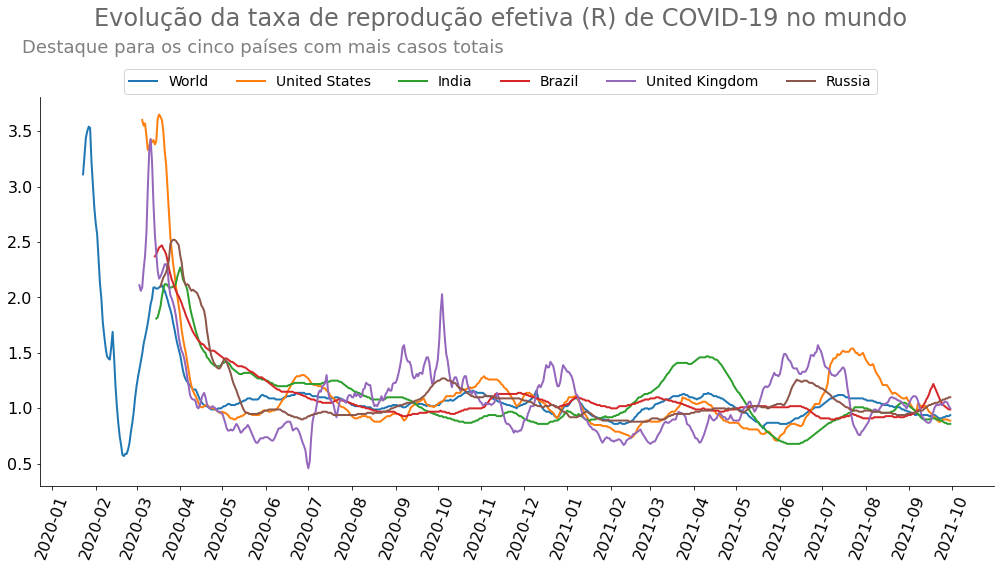

In [40]:
fig, ax = plt.subplots()

x = df.loc[df['location'] == 'World', 'date']
y = df.loc[df['location'] == 'World', 'reproduction_rate']

x1 = df.loc[df['location'] == 'Brazil', 'date']
y1 = df.loc[df['location'] == 'Brazil', 'reproduction_rate']

x2 = df.loc[df['location'] == 'India', 'date']
y2 = df.loc[df['location'] == 'India', 'reproduction_rate']

x3 = df.loc[df['location'] == 'United States', 'date']
y3 = df.loc[df['location'] == 'United States', 'reproduction_rate']

x4 = df.loc[df['location'] == 'United Kingdom', 'date']
y4 = df.loc[df['location'] == 'United Kingdom', 'reproduction_rate']

x5 = df.loc[df['location'] == 'Russia', 'date']
y5 = df.loc[df['location'] == 'Russia', 'reproduction_rate']


ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(myFmt)
ax.tick_params(axis='x', rotation=70)
# ax.yaxis.set_major_formatter(EngFormatter())

ax.plot(x, y, label='World')
ax.plot(x3, y3, label='United States')
ax.plot(x2, y2, label='India')
ax.plot(x1, y1, label='Brazil')
ax.plot(x4, y4, label='United Kingdom')
ax.plot(x5, y5, label='Russia')

plt.suptitle('Evolução da taxa de reprodução efetiva (R) de COVID-19 no mundo\n\n', 
             color='dimgray')
plt.gcf().text(0.025, 0.865, 'Destaque para os cinco países com mais casos totais\n', 
               fontsize=18, color='gray')

handles, labels = ax.get_legend_handles_labels()
        
fig.legend(bbox_to_anchor=(0.5, 0.885), loc='upper center', ncol=8,
          handles=handles, labels=labels)
plt.show()

Aqui vemos mais flutuações, especialmente no caso do Reino Unido. Os períodos de maiores valores coincidem com os períodos de aumento de novos casos vistos anteriormente.

Em um primeiro momento, podemos pensar se há alguma relação entre a taxa de reprodução efetiva e a densidade populacional de um país. Afinal, mais pessoas próximas pode levar à uma maior transmissibilidade. Vamos verificar os países com maiores taxas de reprodução efetiva ao fim de setembro de 2021 e verificar se há algum sinal de correlação:

In [41]:
df_r0_last_date = df_countries_last_date.loc[:, ['location',                                                   
                                                 'continent',
                                                 'population',
                                                 'population_density',                                                
                                                 'reproduction_rate',]].sort_values(by='reproduction_rate', ascending=False)[:10]
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(HTML(df_r0_last_date.reset_index(drop=True).to_html(index=False)))

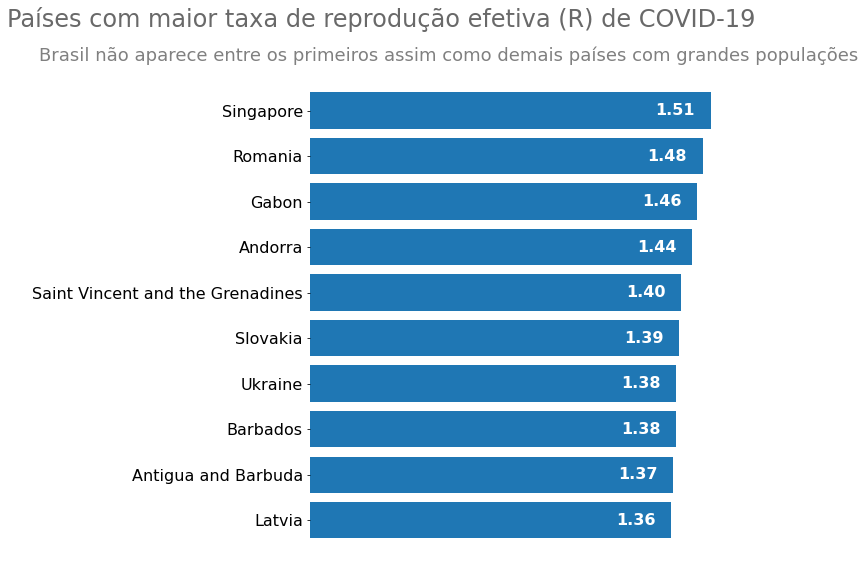

In [42]:
fig, ax = plt.subplots(figsize=(10, 8))

x = df_r0_last_date['location']
y = df_r0_last_date['reproduction_rate']

ind = range(len(y))
ax.barh(ind, y)
ax.set_yticks(ind)
ax.set_yticklabels(x)

labels = y.values
ax.bar_label(ax.containers[0], padding=-55, labels=map(eng_format, labels),
             color='white', fontsize=16, weight='bold')

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticklabels([])
ax.set_xticks([])

ax.set_frame_on(False)
ax.invert_yaxis()

plt.suptitle('Países com maior taxa de reprodução efetiva (R) de COVID-19\n', 
             color='dimgray')
plt.gcf().text(0.025, 0.85, 'Brasil não aparece entre os primeiros assim como demais países com grandes populações\n', 
               fontsize=18, color='gray')
plt.show()

In [43]:
fig = px.scatter(df_countries_last_date.dropna(how='all', 
                                               subset=['total_cases_per_million']), 
                 x='population_density', 
                 y='reproduction_rate', 
                 size='total_cases_per_million', 
                 color='continent', 
                 hover_name='location', 
                 size_max=40, 
                 width=900, 
                 log_x=True)


fig.update_layout(
    margin = dict(t=80, l=0, r=200, b=10), 
    title={
        'text': 'Taxa de reprodução efetiva (R) e densidade populacional<br>',
        'font': {'size': 24, 'color': 'dimgray'},
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis={
        'title': 'Densidade populacional',        
    },
    yaxis={
        'title': 'Taxa de reprodução',        
    },
    legend={
        'title': ''
    },
    annotations=[{
        'text': '<b>Tamanho</b>: Total de casos por milhão. <b>Cor</b>: Continente. Densidade populacional em escala logarítmica',
        'font': {
            'size': 18,
            'color': 'gray',
        },
        'showarrow': False,
        'align': 'left',
        'x': 0.0,
        'y': 1.1,
        'xanchor': 'left',
        'yanchor': 'top',
        'xref': 'paper', 
        'yref': 'paper',
    }]
)

fig.show()

Vemos que Singapura, localidade com segunda maior densidade populacional do mundo, apresentava ao final de setembro de 2021 a maior taxa de reprodução. No entanto, Mônaco, maior densidade, está com valor de R < 1. Ao menos pelo gráfico, não parece haver uma correlação tão direta entre as duas variáveis, mas como são dinâmicas o ideal é fazer uma análise temporal e não estática como no caso. Perceba, também, que a variável escolhida para o tamanho dos círculos foi o total de casos por milhão em cada localidade. Veja que há localidades com grande quantidade de casos acumulados mas com R < 1, indicando que já tiveram momentos de maior contágio no passado mas que, em setembro de 2021, estavam em momentos de retração de contágio.

## Evolução do número de mortes

<center><img alt="covid_banner" width="50%" src="https://image.freepik.com/free-vector/coronavirus-cells-banner_1035-18749.jpg"></center>

Infelizmente alguns casos acabam levando a mortes. Vamos analisar como foi a evolução dos números.

### Total de mortes

#### Mundo 

Começando pelo total de mortes no mundo:

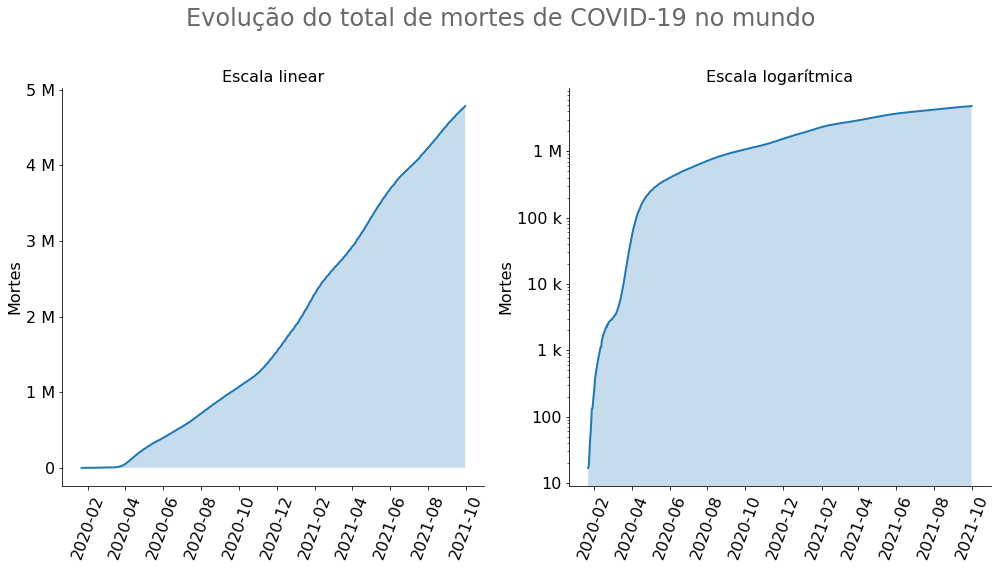

In [44]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

x = df.loc[df['location'] == 'World', 'date']
y = df.loc[df['location'] == 'World', 'total_deaths']

for ax in (ax1, ax2):
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(myFmt)
    ax.tick_params(axis='x', rotation=70)
    ax.set_ylabel('Mortes')
    ax.fill_between(x, y, alpha=0.25)
    
ax1.plot(x, y)
ax1.set_title('Escala linear')
ax1.yaxis.set_major_formatter(EngFormatter())

ax2.plot(x, y)
ax2.set_yscale('log')
ax2.set_title('Escala logarítmica')
ax2.yaxis.set_major_formatter(EngFormatter())

plt.suptitle('Evolução do total de mortes de COVID-19 no mundo\n', 
             color='dimgray')

plt.show()

Observe que a ordem de grandeza dos eixos é bem menor que a vista no gráfico análogo referente ao número de casos. Voltaremos a esse ponto posteriormente.

Vejamos se há alguma possível relação entre o total de óbitos e as variantes:

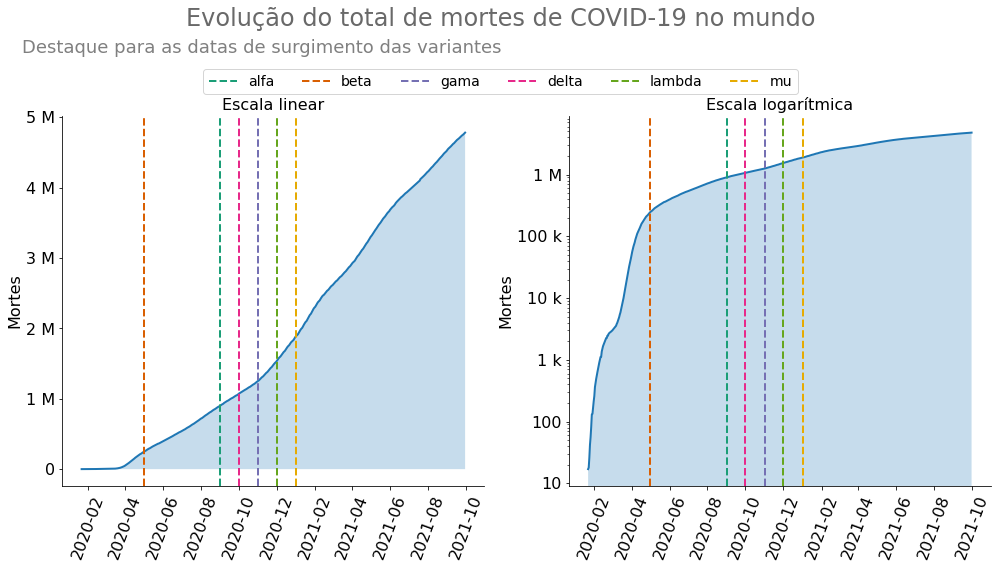

In [45]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

x = df.loc[df['location'] == 'World', 'date']
y = df.loc[df['location'] == 'World', 'total_deaths']

for ax in (ax1, ax2):
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(myFmt)
    ax.tick_params(axis='x', rotation=70)    
    ax.set_ylabel('Mortes')
    ax.fill_between(x, y, alpha=0.25)
    
ax1.plot(x, y)
ax1.yaxis.set_major_formatter(EngFormatter())
ax1.set_title('Escala linear')

ax2.plot(x, y)
ax2.set_yscale('log')
ax2.yaxis.set_major_formatter(EngFormatter())
ax2.set_title('Escala logarítmica')

for color, var in zip(colors, variants):
    for ax in (ax1, ax2):
        ax.axvline(x=variants[var], label=var, linestyle='--', color=color)

plt.suptitle('Evolução do total de mortes de COVID-19 no mundo\n\n', 
             color='dimgray')
plt.gcf().text(0.025, 0.865, 'Destaque para as datas de surgimento das variantes\n', 
               fontsize=18, color='gray')

handles, labels = ax1.get_legend_handles_labels()
        
fig.legend(bbox_to_anchor=(0.5, 0.885), loc='upper center', ncol=8,
          handles=handles, labels=labels)
plt.show()

Embora em ordem de grandeza bem menor, o total de mortes parece seguir as tendências apresentadas no estudo de total de casos.

#### Principais países

##### Totais absolutos

Vamos verificar os países que possuem os maiores totais de óbitos até setembro de 2021:

In [46]:
temp = df_countries_last_date.loc[:, ['location', 
                                      'continent',
                                      'population',
                                      'total_deaths',
                                      ]].sort_values(by="total_deaths", 
                                                                ascending=False)[0:10]

with pd.option_context('display.float_format', '{:,.0f}'.format):
    display(HTML(temp.reset_index(drop=True).to_html(index=False)))

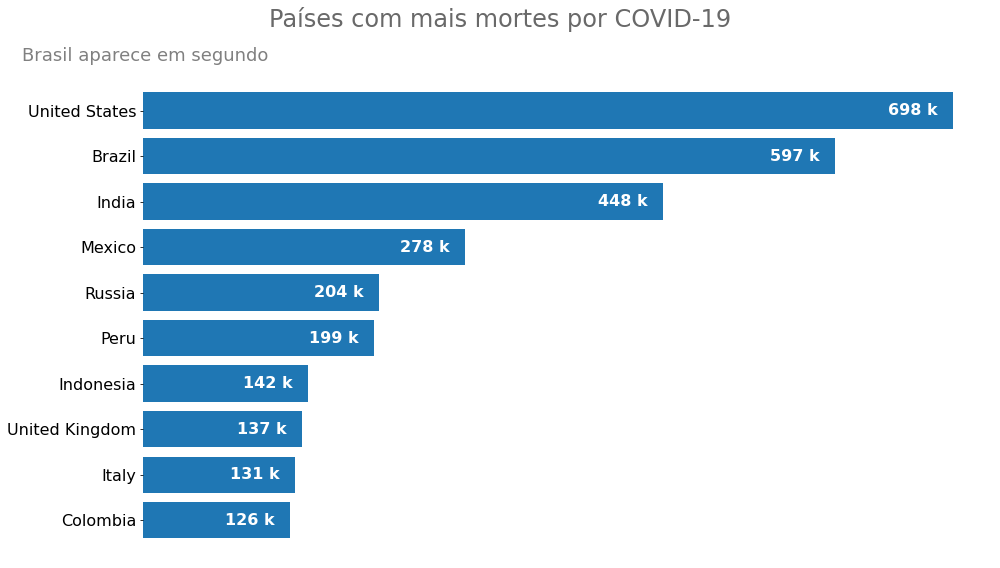

In [47]:
fig, ax = plt.subplots()
x = temp['location']
y = temp['total_deaths']

ind = range(len(y))
ax.barh(ind, y)
ax.set_yticks(ind)
ax.set_yticklabels(x)

labels = y.values
ax.bar_label(ax.containers[0], padding=-65, labels=map(eng_format_k, labels),
             color='white', fontsize=16, weight='bold')

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticklabels([])
ax.set_xticks([])

ax.set_frame_on(False)
ax.invert_yaxis()

plt.suptitle('Países com mais mortes por COVID-19\n', 
             color='dimgray')
plt.gcf().text(0.025, 0.85, 'Brasil aparece em segundo\n', 
               fontsize=18, color='gray')
plt.show()

Vemos que o Brasil aparece em segundo, atrás apenas dos Estados Unidos. Também observamos a presença de dois outros países da América do Sul entre os 10 países: o Peru e a Colômbia. Como tais países não possuem populações tão numerosas quanto os primeiros colocados, é um sinal que a proporção de mortes por milhão em tais países é alta, o que veremos mais adiante.

Vamos verificar o total de óbitos até o momento por país de cada continente:

In [48]:
fig = px.treemap(df_countries_last_date.dropna(how='all', 
                                               subset=['total_deaths']), 
                 path=[px.Constant('World'), 'continent','location'], 
                 values='total_deaths',
                 color='total_deaths',                  
                 color_continuous_scale='Blues',
                 custom_data=['total_deaths'],
                 )


fig.data[0].customdata[-1] = df_world.loc[df_world['date'] == last_date, 'total_deaths']
fig.data[0].customdata[-7:-1] = df_continent_last_date[['total_deaths']].values



fig.update_traces(hovertemplate='<b>%{label}</b><br>%{customdata:,.0f}')
fig.update_layout(margin = dict(t=80, l=0, r=0, b=10), 
                  coloraxis_colorbar=dict(title=None, thickness=30, len=1),                  
                  title={
                      'text': 'Total de mortes por COVID-19 no mundo<br>',
                      'font': {'size': 24, 'color': 'dimgray'},
                      'y':0.95,
                      'x':0.5,
                      'xanchor': 'center',
                      'yanchor': 'top'},
                 annotations= [{
                     'text': "Mortes por continente e país. Clique em um continente para detalhes",
                     'font': {
                         'size': 18,
                         'color': 'gray',
                     },
                     'showarrow': False,
                     'align': 'left',
                     'x': 0.0,
                     'y': 1.1,
                     'xanchor': 'left',
                     'yanchor': 'top',
                 }])

fig.show()

##### Totais por milhão de habitantes

Como já discutido ao apresentar os dados referentes a casos de COVID-19, números absolutos por vezes distorcem nossa percepção sobre os impactos reais em cada localidade. Faz mais sentido avaliar os números por milhão de habitantes. Vamos, então, construir a tabela e o gráfico:

In [49]:
temp = df_countries_last_date.loc[:, ['location', 
                                      'continent',
                                      'total_deaths_per_million',
                                      ]].sort_values(by="total_deaths_per_million", 
                                                                ascending=False)[0:10]

with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(HTML(temp.reset_index(drop=True).to_html(index=False)))

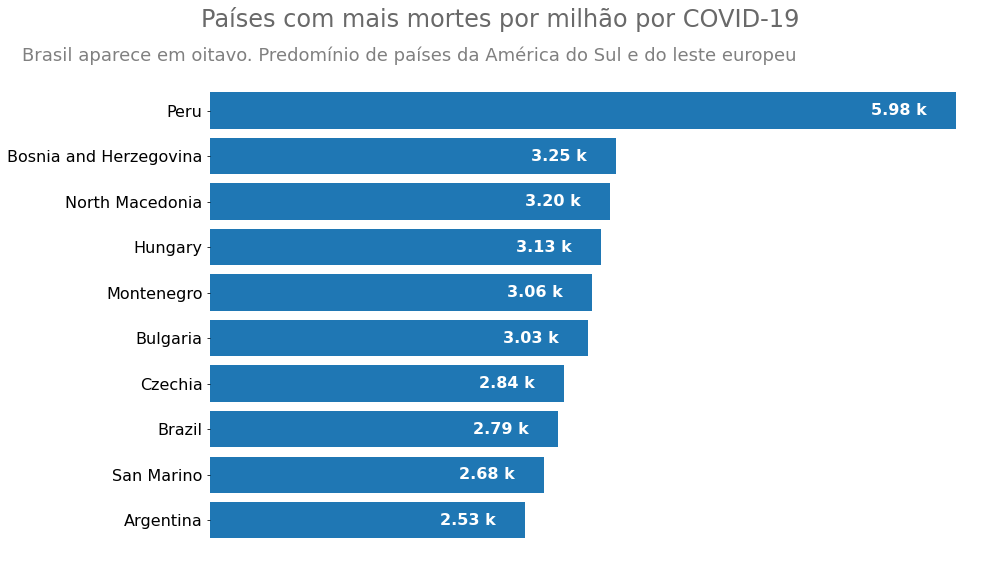

In [50]:
fig, ax = plt.subplots()
x = temp['location']
y = temp['total_deaths_per_million']

ind = range(len(y))
ax.barh(ind, y)
ax.set_yticks(ind)
ax.set_yticklabels(x)

labels = y.values
ax.bar_label(ax.containers[0], padding=-85, labels=map(eng_format, labels),
             color='white', fontsize=16, weight='bold')

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticklabels([])
ax.set_xticks([])

ax.set_frame_on(False)
ax.invert_yaxis()

plt.suptitle('Países com mais mortes por milhão por COVID-19\n', 
             color='dimgray')
plt.gcf().text(0.025, 0.85, 'Brasil aparece em oitavo. Predomínio de países da América do Sul e do leste europeu\n', 
               fontsize=18, color='gray')
plt.show()

Percebe-se claramente que a situação do Peru é diferenciada. E tal situação vem chamando a atenção [da mídia mundial](https://www.bbc.com/news/world-latin-america-53150808) e de [periódicos especializados](https://www.bmj.com/content/373/bmj.n1442). As condições precárias em regiões mais pobres do país e problemas no setor de saúde parecem  contribuir para o alto número de óbitos. Da mesma forma, a situação do leste europeu [tem gerado manchetes](https://www.ft.com/content/06b30dfb-998e-443f-a2bd-41f0b2ca4ab9) nos principais veículos de mídia mundiais.

Vamos analisar a situação de cada país por continente:

In [51]:
fig = px.treemap(df_countries_last_date.dropna(how='all', 
                                               subset=['total_deaths_per_million']), 
                 path=[px.Constant('World'), 'continent','location'], 
                 values='total_deaths_per_million',
                 color='total_deaths_per_million', 
                 color_continuous_scale='Blues',
                 custom_data=['total_deaths_per_million'],
                 )

fig.data[0].customdata[-1] = df_world.loc[df_world['date'] == last_date, 'total_deaths_per_million']
fig.data[0].customdata[-7:-1] = df_continent_last_date[['total_deaths_per_million']].values

fig.update_traces(hovertemplate='<b>%{label}</b><br>%{customdata:,.2f}')
fig.update_layout(margin = dict(t=80, l=0, r=0, b=10), 
                  coloraxis_colorbar=dict(title=None, thickness=30, len=1),                  
                  title={
                      'text': 'Total de mortes por milhão por COVID-19<br>',
                      'font': {'size': 24, 'color': 'dimgray'},
                      'y':0.95,
                      'x':0.5,
                      'xanchor': 'center',
                      'yanchor': 'top'},
                 annotations= [{
                     'text': "Mortes por milhão por continente e país. Clique em um continente para detalhes",
                     'font': {
                         'size': 18,
                         'color': 'gray',
                     },
                     'showarrow': False,
                     'align': 'left',
                     'x': 0.0,
                     'y': 1.1,
                     'xanchor': 'left',
                     'yanchor': 'top',
                 }])

fig.show()

Já fiz uma pequena discussão na parte de casos acerca de países que provavelmente estão com dados abaixo dos números reais. Mas aqui cabe mais algumas observações sobre este tópico.

Começando pela América do Sul, percebemos a quase ausência da Venezuela, com um número muito abaixo de seus vizinhos. Obviamente que a situação chamou a atenção a ponto de a [Nature](https://www.nature.com/articles/d41586-021-02276-1) e o periódico [BMJ](https://www.bmj.com/content/371/bmj.m3938) irem verificar a situação. Como é de se esperar de regimes ditatoriais, há grande opressão governamental para abafar os casos e óbitos, além de falta de recursos básicos para controle da situação, conforme descrito nos links.

Na América do Norte, apesar de boa parte da atenção midiática ser destinada aos Estados Unidos, vemos que o México possui maior número de óbitos por milhão de habitantes.

Por fim, um pouco sobre a África e a Ásia. De acordo com as [Nações Unidas](https://unstats.un.org/unsd/demographic-social/crvs/#coverage) parte significativa dos países africanos e asiáticos não possuem registros de mortes eficientes, conforme figura abaixo retirada do site da instituição. Desta forma, cuidado deve ser tomado ao se fazer comparações com estes países.

<center><img alt="covid_banner" width="60%" src="https://unstats.un.org/unsd/demographic-social/crvs/documents/DeathCov.jpg"></center>

Há também [esta notícia](https://www.bbc.com/news/world-africa-55674139) a respeito dos problemas de registro de óbitos em países africanos.

Vejamos um mapa interativo da evolução das mortes por milhão em cada país:

In [52]:
fig = px.choropleth(df_countries_monthly, 
                    locations="iso_code",
                    color='total_deaths_per_million',
                    hover_name="location",
                    color_continuous_scale=px.colors.sequential.Blues,
                    width=900,
                    height=600,
                    animation_frame=df_countries_monthly.index.astype(str),
                    animation_group='iso_code'
                    )

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        resolution=110
    ),
    margin = dict(t=80, l=0, r=0, b=0), 
    coloraxis_colorbar=dict(title='Mortes / milhão', thickness=30, len=1),
    title={
        'text': 'Evolução de mortes por milhão de COVID-19<br>',
        'font': {'size': 24, 'color': 'dimgray'},
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    annotations= [{
        'text': "Mortes por milhão para cada país entre 2020 e setembro de 2021",
        'font': {
            'size': 18,
            'color': 'gray',
        },
        'showarrow': False,
        'align': 'left',
        'x': 0.0,
        'y': 1.1,
        'xanchor': 'left',
        'yanchor': 'top',
    }])

fig.show()

#### Idade e riqueza

Vamos verificar se o número de mortes possui alguma relação com a renda per capita do país ou a idade da população.

Comecemos verificando os países com maior PIB per capita:

In [53]:
temp = df_countries_last_date.loc[:, ['location', 
                                      'continent',
                                      'total_deaths', 
                                      'total_deaths_per_million', 
                                      'gdp_per_capita', 
                                     ]].sort_values(by="gdp_per_capita", 
                                                    ascending=False)[0:10]

with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(HTML(temp.to_html(index=False)))

In [54]:
fig = px.scatter(df_countries_last_date.dropna(how='all', 
                                               subset=['gdp_per_capita']), 
                 x='life_expectancy', 
                 y='total_deaths_per_million', 
                 size='gdp_per_capita', 
                 color='continent', 
                 hover_name='location', 
                 size_max=40, 
                 width=900, 
                 )

fig.update_layout(
    margin = dict(t=80, l=0, r=200, b=10), 
    title={
        'text': 'Total de mortes por milhão de COVID-19 e expectativa de vida<br>',
        'font': {'size': 24, 'color': 'dimgray'},
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis={
        'title': 'Expectativa de vida',        
    },
    yaxis={
        'title': 'Total de mortes por milhão',        
    },
    legend={
        'title': ''
    },
    annotations=[{
        'text': '<b>Tamanho</b>: PIB per capita. <b>Cor</b>: continente',
        'font': {
            'size': 18,
            'color': 'gray',
        },
        'showarrow': False,
        'align': 'left',
        'x': 0.0,
        'y': 1.1,
        'xanchor': 'left',
        'yanchor': 'top',
        'xref': 'paper', 
        'yref': 'paper',
    }]
)

fig.show()

No gráfico, vemos claramente que os países do continente africano possuem, em sua maioria, menores expectativas de vida e menores PIB per capita (menores círculos no gráfico). Seicheles, que é país africano com maior PIB per capita e uma das maiores expectativas de vida do continente e lidera os dados mundiais em total de casos por milhão, fica apenas em quarto no continente no que diz respeito a mortes por milhão.

Vemos uma tendência em outros continentes de maiores expectativas de vida apresentarem mais óbitos. Obviamente que países mais ricos tendem a ter populações mais velhas ou, melhor dizendo, maior parcela da população com idade avançada e, como a doença afeta mais pessoas idosas, é de se esperar maior quantidade de óbitos nesses países. No entanto, cabe destacar que há notáveis exceções nessa tendência como, por exemplo, o Japão. Singapura também é uma notável exceção, sendo que vimos anteriormente que é o país com maior taxa de reprodução efetiva ao fim de setembro de 2021. 

Uma maior expectativa de vida, no entanto, não necessariamente significa que a população atual possui mais idosos que jovens. Assim, vamos repetir o gráfico substituindo o eixo de expectativa de vida por mediana de idade:

In [55]:
fig = px.scatter(df_countries_last_date.dropna(how='all', 
                                               subset=['gdp_per_capita']), 
                 x='median_age', 
                 y='total_deaths_per_million', 
                 size='gdp_per_capita', 
                 color='continent', 
                 hover_name='location', 
                 size_max=40, 
                 width=900, 
                 )

fig.update_layout(
    margin = dict(t=80, l=0, r=200, b=10), 
    title={
        'text': 'Total de mortes por milhão de COVID-19 e mediana de idade da população<br>',
        'font': {'size': 24, 'color': 'dimgray'},
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis={
        'title': 'Mediana de idade da população',        
    },
    yaxis={
        'title': 'Total de mortes por milhão',        
    },
    legend={
        'title': ''
    },
    annotations=[{
        'text': '<b>Tamanho</b>: PIB per capita. <b>Cor</b>: continente',
        'font': {
            'size': 18,
            'color': 'gray',
        },
        'showarrow': False,
        'align': 'left',
        'x': 0.0,
        'y': 1.1,
        'xanchor': 'left',
        'yanchor': 'top',
        'xref': 'paper', 
        'yref': 'paper',
    }]
)

fig.show()

Vemos a mesma tendência: população mais idosa, mais mortes.

### Novas mortes

Até o momento focamos em avaliar a evolução do total de óbitos no mundo e em cada país. Agora, vamos verificar a evolução de novos óbitos, à medida que foram sendo reportados. Assim, podemos verificar em quais momentos ocorreram as popularmente chamadas "ondas".

A base de dados apresenta as entradas na forma de dados diários e na forma de média móvel de 7 dias. A média móvel ajuda a visualizar melhor a tendência dos dados, visto que há grande variação dos dados diários. Vamos começar com as mortes em todo mundo:

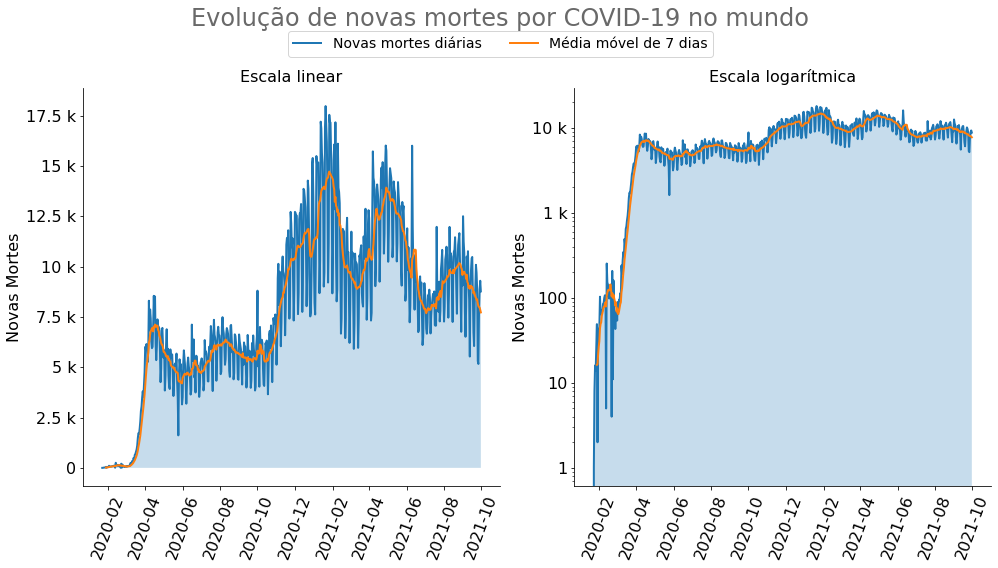

In [56]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

x = df.loc[df['location'] == 'World', 'date']
y = df.loc[df['location'] == 'World', 'new_deaths']
y2 = df.loc[df['location'] == 'World', 'new_deaths_smoothed']

for ax in (ax1, ax2):
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(myFmt)
    ax.tick_params(axis='x', rotation=70)
    ax.set_ylabel('Novas Mortes')
    ax.fill_between(x, y, alpha=0.25)

ax1.plot(x, y, label='Novas mortes diárias')
ax1.plot(x, y2, label='Média móvel de 7 dias')
ax1.yaxis.set_major_formatter(EngFormatter())
ax1.set_title('Escala linear')

ax2.plot(x, y)
ax2.plot(x, y2)
ax2.set_yscale('log')
ax2.yaxis.set_major_formatter(EngFormatter())
ax2.set_title('Escala logarítmica')

plt.suptitle('Evolução de novas mortes por COVID-19 no mundo\n', 
             color='dimgray')

handles, labels = ax1.get_legend_handles_labels()

fig.legend(bbox_to_anchor=(0.5, 0.95), loc='upper center', ncol=8,
          handles=handles, labels=labels)
plt.show()

Vemos que os novos óbitos acompanham o perfil de novos casos já discutido anteriormente, notando-se apenas uma grande diminuição na ordem de grandeza. Desta forma, as mesmas discussões e relações observadas com as datas de variantes e épocas de inverno se mantêm:

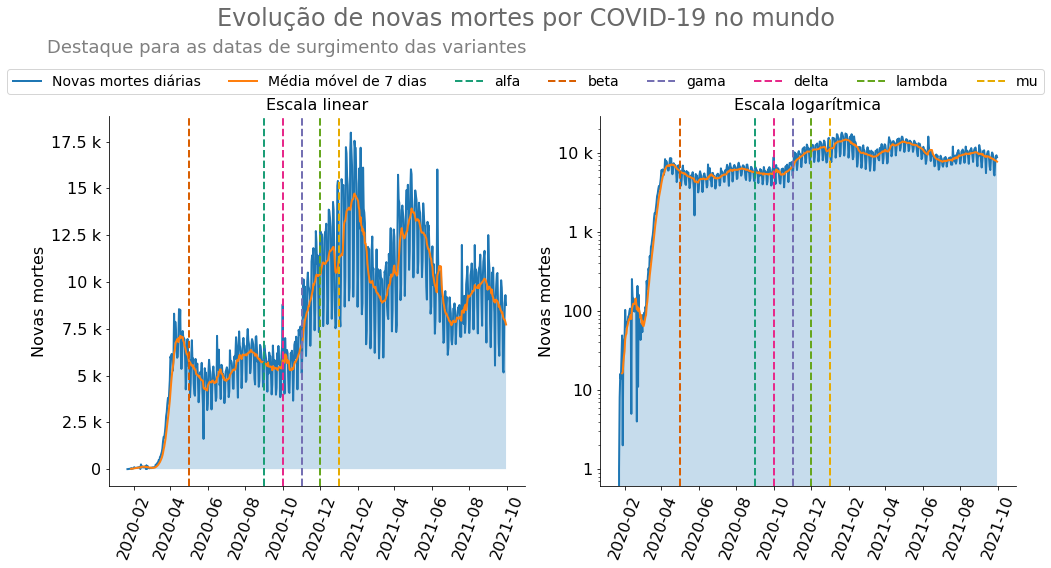

In [57]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

x = df.loc[df['location'] == 'World', 'date']
y = df.loc[df['location'] == 'World', 'new_deaths']
y2 = df.loc[df['location'] == 'World', 'new_deaths_smoothed']

for ax in (ax1, ax2):
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(myFmt)
    ax.tick_params(axis='x', rotation=70)
    ax.set_ylabel('Novas mortes')
    ax.fill_between(x, y, alpha=0.25)

ax1.plot(x, y, label='Novas mortes diárias')
ax1.plot(x, y2, label='Média móvel de 7 dias')
ax1.yaxis.set_major_formatter(EngFormatter())
ax1.set_title('Escala linear')

ax2.plot(x, y)
ax2.plot(x, y2)
ax2.set_yscale('log')
ax2.yaxis.set_major_formatter(EngFormatter())
ax2.set_title('Escala logarítmica')

for color, var in zip(colors, variants):
    for ax in (ax1, ax2):
        ax.axvline(x=variants[var], label=var, linestyle='--', color=color)

plt.suptitle('Evolução de novas mortes por COVID-19 no mundo\n\n', 
             color='dimgray')
plt.gcf().text(0.025, 0.865, 'Destaque para as datas de surgimento das variantes\n', 
               fontsize=18, color='gray')

handles, labels = ax1.get_legend_handles_labels()
        
fig.legend(bbox_to_anchor=(0.5, 0.885), loc='upper center', ncol=8,
          handles=handles, labels=labels)
plt.show()

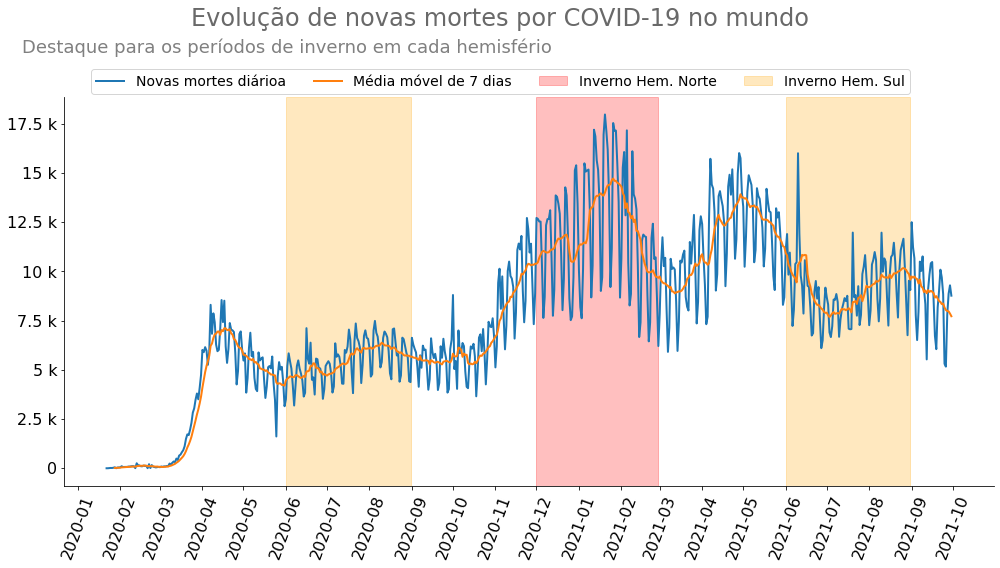

In [58]:
fig, ax1 = plt.subplots()

x = df.loc[df['location'] == 'World', 'date']
y = df.loc[df['location'] == 'World', 'new_deaths']
y2 = df.loc[df['location'] == 'World', 'new_deaths_smoothed']

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(myFmt)
ax1.tick_params(axis='x', rotation=70)

ax1.plot(x, y, label='Novas mortes diárioa')
ax1.plot(x, y2, label='Média móvel de 7 dias')
# ax1.fill_between(x, y2, alpha=0.25)
ax1.yaxis.set_major_formatter(EngFormatter())

ax1.axvspan(*mdates.datestr2num(['2020-12-1', '2021-02-28']), color='red', alpha=0.25, label='Inverno Hem. Norte')
ax1.axvspan(*mdates.datestr2num(['2020-06-1', '2020-08-31']), color='orange', alpha=0.25, label='Inverno Hem. Sul')
ax1.axvspan(*mdates.datestr2num(['2021-06-1', '2021-08-31']), color='orange', alpha=0.25)

plt.suptitle('Evolução de novas mortes por COVID-19 no mundo\n\n', 
             color='dimgray')
plt.gcf().text(0.025, 0.865, 'Destaque para os períodos de inverno em cada hemisfério\n', 
               fontsize=18, color='gray')

handles, labels = ax1.get_legend_handles_labels()
        
fig.legend(bbox_to_anchor=(0.5, 0.885), loc='upper center', ncol=8,
          handles=handles, labels=labels)
plt.show()

Da mesma maneira, as comparações com os países com mais casos e com os continentes individuais feitas na discussão sobre os casos continuam válidas para os óbitos:

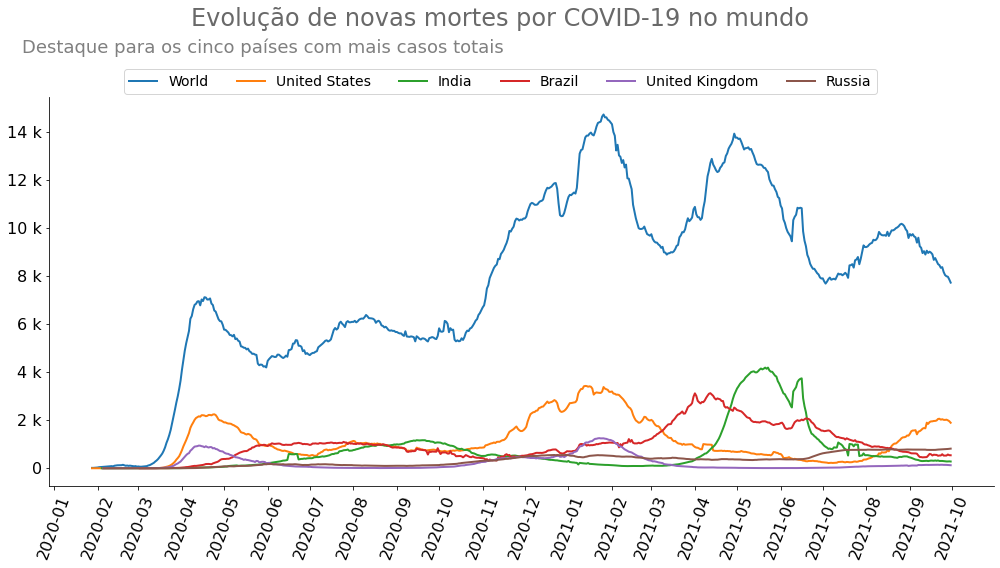

In [59]:
fig, ax = plt.subplots()

x = df.loc[df['location'] == 'World', 'date']
y = df.loc[df['location'] == 'World', 'new_deaths_smoothed']

x1 = df.loc[df['location'] == 'Brazil', 'date']
y1 = df.loc[df['location'] == 'Brazil', 'new_deaths_smoothed']

x2 = df.loc[df['location'] == 'India', 'date']
y2 = df.loc[df['location'] == 'India', 'new_deaths_smoothed']

x3 = df.loc[df['location'] == 'United States', 'date']
y3 = df.loc[df['location'] == 'United States', 'new_deaths_smoothed']

x4 = df.loc[df['location'] == 'United Kingdom', 'date']
y4 = df.loc[df['location'] == 'United Kingdom', 'new_deaths_smoothed']

x5 = df.loc[df['location'] == 'Russia', 'date']
y5 = df.loc[df['location'] == 'Russia', 'new_deaths_smoothed']


ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(myFmt)
ax.tick_params(axis='x', rotation=70)
ax.yaxis.set_major_formatter(EngFormatter())

ax.plot(x, y, label='World')
ax.plot(x3, y3, label='United States')
ax.plot(x2, y2, label='India')
ax.plot(x1, y1, label='Brazil')
ax.plot(x4, y4, label='United Kingdom')
ax.plot(x5, y5, label='Russia')

plt.suptitle('Evolução de novas mortes por COVID-19 no mundo\n\n', 
             color='dimgray')
plt.gcf().text(0.025, 0.865, 'Destaque para os cinco países com mais casos totais\n', 
               fontsize=18, color='gray')

handles, labels = ax.get_legend_handles_labels()
        
fig.legend(bbox_to_anchor=(0.5, 0.885), loc='upper center', ncol=8,
          handles=handles, labels=labels)
plt.show()

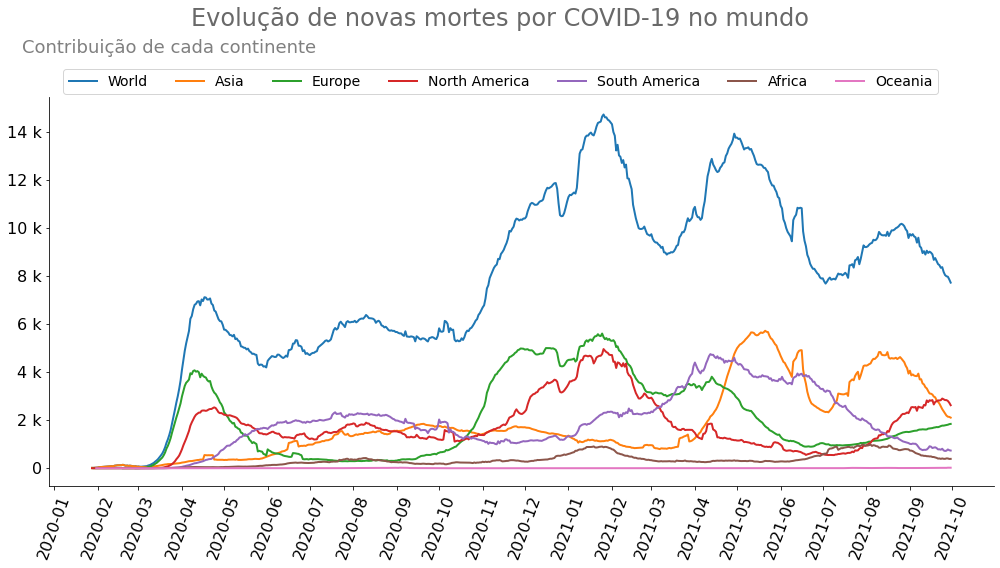

In [60]:
fig, ax = plt.subplots()

x = df.loc[df['location'] == 'World', 'date']
y = df.loc[df['location'] == 'World', 'new_deaths_smoothed']

x1 = df_continent.loc[df_continent['location'] == 'Africa', 'date']
y1 = df_continent.loc[df_continent['location'] == 'Africa', 'new_deaths_smoothed']

x2 = df_continent.loc[df_continent['location'] == 'Europe', 'date']
y2 = df_continent.loc[df_continent['location'] == 'Europe', 'new_deaths_smoothed']

x3 = df_continent.loc[df_continent['location'] == 'Oceania', 'date']
y3 = df_continent.loc[df_continent['location'] == 'Oceania', 'new_deaths_smoothed']

x4 = df_continent.loc[df_continent['location'] == 'Asia', 'date']
y4 = df_continent.loc[df_continent['location'] == 'Asia', 'new_deaths_smoothed']

x5 = df_continent.loc[df_continent['location'] == 'North America', 'date']
y5 = df_continent.loc[df_continent['location'] == 'North America', 'new_deaths_smoothed']

x6 = df_continent.loc[df_continent['location'] == 'South America', 'date']
y6 = df_continent.loc[df_continent['location'] == 'South America', 'new_deaths_smoothed']

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(myFmt)
ax.tick_params(axis='x', rotation=70)
ax.yaxis.set_major_formatter(EngFormatter())

ax.plot(x, y, label='World')
ax.plot(x4, y4, label='Asia')
ax.plot(x2, y2, label='Europe')
ax.plot(x5, y5, label='North America')
ax.plot(x6, y6, label='South America')
ax.plot(x1, y1, label='Africa')
ax.plot(x3, y3, label='Oceania')

plt.suptitle('Evolução de novas mortes por COVID-19 no mundo\n\n', 
             color='dimgray')
plt.gcf().text(0.025, 0.865, 'Contribuição de cada continente\n', 
               fontsize=18, color='gray')

handles, labels = ax.get_legend_handles_labels()
        
fig.legend(bbox_to_anchor=(0.5, 0.885), loc='upper center', ncol=8,
          handles=handles, labels=labels)
plt.show()

A sazonalidade pode ser observada nos mapas interativos de novas mortes e novas mortes por milhão:

In [61]:
fig = px.choropleth(df_countries_monthly, locations="iso_code",
                    color='new_deaths',
                    hover_name="location",
                    color_continuous_scale=px.colors.sequential.Blues,
                    width=900,
                    height=600,
                    animation_frame=df_countries_monthly.index.astype(str),
                    animation_group='iso_code'
                    )

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        resolution=110
    ),
    margin = dict(t=80, l=0, r=0, b=0), 
    coloraxis_colorbar=dict(title='Novas mortes', thickness=30, len=1),
    title={
        'text': 'Evolução de novas mortes por COVID-19<br>',
        'font': {'size': 24, 'color': 'dimgray'},
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    annotations= [{
        'text': "Sazonalidade dos óbitos. Compare, por exemplo, EUA e Brasil",
        'font': {
            'size': 18,
            'color': 'gray',
        },
        'showarrow': False,
        'align': 'left',
        'x': 0.0,
        'y': 1.1,
        'xanchor': 'left',
        'yanchor': 'top',
    }])

fig.show()

In [62]:
fig = px.choropleth(df_countries_monthly, locations="iso_code",
                    color='new_deaths_per_million',
                    hover_name="location",
                    color_continuous_scale=px.colors.sequential.Blues,
                    width=900,
                    height=600,
                    animation_frame=df_countries_monthly.index.astype(str),
                    animation_group='iso_code'
                    )

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        resolution=110
    ),
    margin = dict(t=80, l=0, r=0, b=0), 
    coloraxis_colorbar=dict(title='Novas mortes / milhão', thickness=30, len=1),
    title={
        'text': 'Evolução de novas mortes por milhão por COVID-19<br>',
        'font': {'size': 24, 'color': 'dimgray'},
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    annotations= [{
        'text': "Sazonalidade dos óbitos. Compare, por exemplo, EUA e Brasil",
        'font': {
            'size': 18,
            'color': 'gray',
        },
        'showarrow': False,
        'align': 'left',
        'x': 0.0,
        'y': 1.1,
        'xanchor': 'left',
        'yanchor': 'top',
    }])

fig.show()

## Evolução no número de vacinados

<center><img alt="covid_banner" width="50%" src="https://image.freepik.com/free-photo/close-up-hand-holding-coronavirus-vaccine_23-2149012368.jpg"></center>

Certamente um dos pontos mais discutidos recentemente no contexto da pandemia. Vamos verificar a evolução.

### Total de vacinados

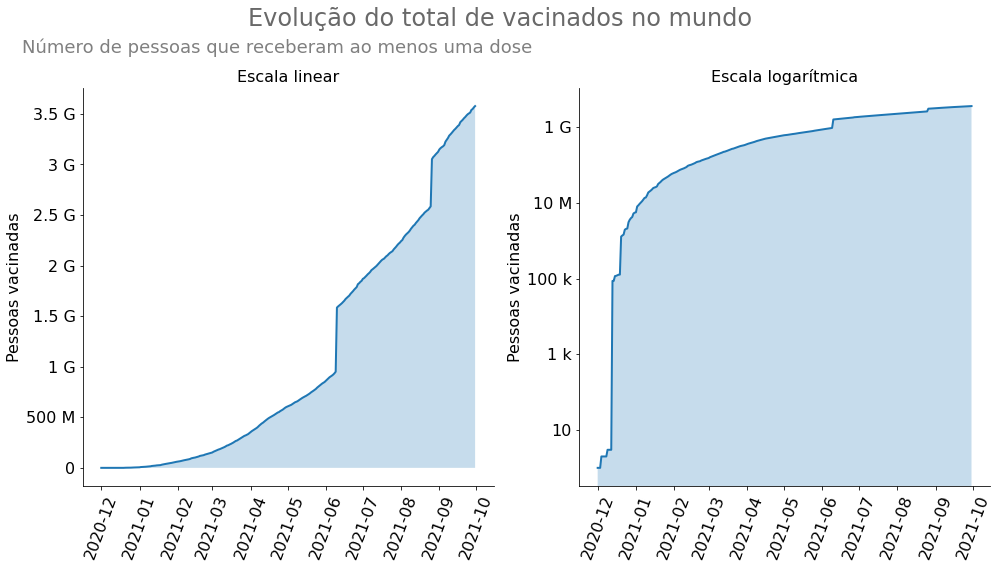

In [63]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

x = df.loc[df['location'] == 'World', 'date']
y = df.loc[df['location'] == 'World', 'people_vaccinated']

for ax in (ax1, ax2):
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(myFmt)
    ax.tick_params(axis='x', rotation=70)
    ax.fill_between(x, y, alpha=0.25)
    ax.set_ylabel('Pessoas vacinadas')
    
ax1.plot(x, y)
ax1.set_title('Escala linear')
ax1.yaxis.set_major_formatter(EngFormatter())

ax2.plot(x, y)
ax2.set_yscale('log')
ax2.set_title('Escala logarítmica')
ax2.yaxis.set_major_formatter(EngFormatter())

plt.suptitle('Evolução do total de vacinados no mundo\n', 
             color='dimgray')
plt.gcf().text(0.025, 0.865, 'Número de pessoas que receberam ao menos uma dose\n', 
               fontsize=18, color='gray')

plt.show()

Os gráficos começam em dezembro de 2020, quando as primeiras doses foram aplicadas ao redor do mundo. Vemos que, até setembro de 2021, cerca de 3,5 bilhões de pessoas já receberam ao menos uma dose da vacina, praticamente metade da população mundial. Os saltos nos gráficos se devem a questões de disponibilização dos dados.

Vejamos quantas pessoas já receberam todas as doses protocolares:

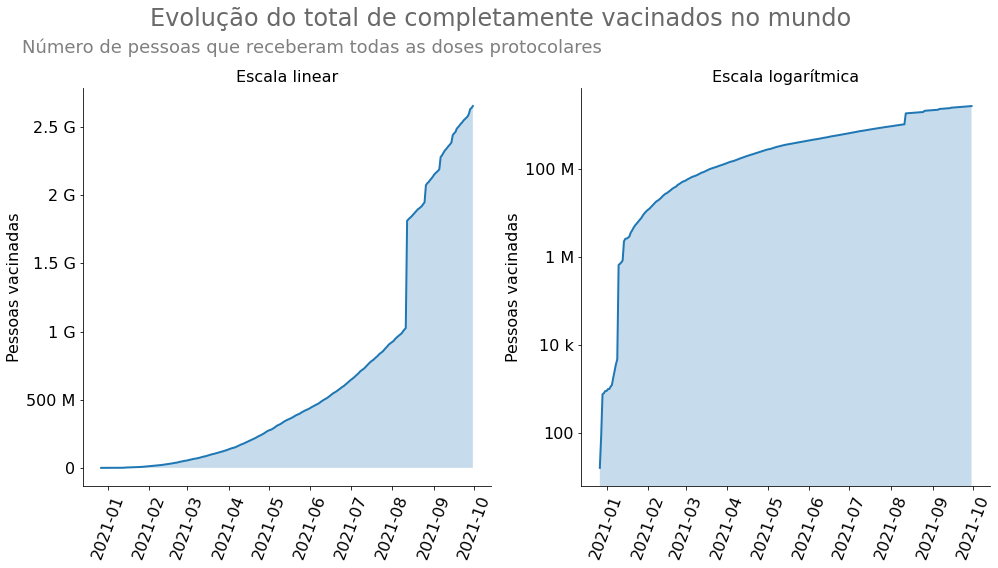

In [64]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

x = df.loc[df['location'] == 'World', 'date']
y = df.loc[df['location'] == 'World', 'people_fully_vaccinated']

for ax in (ax1, ax2):
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(myFmt)
    ax.tick_params(axis='x', rotation=70)
    ax.fill_between(x, y, alpha=0.25)
    ax.set_ylabel('Pessoas vacinadas')
    
ax1.plot(x, y)
ax1.set_title('Escala linear')
ax1.yaxis.set_major_formatter(EngFormatter())

ax2.plot(x, y)
ax2.set_yscale('log')
ax2.set_title('Escala logarítmica')
ax2.yaxis.set_major_formatter(EngFormatter())

plt.suptitle('Evolução do total de completamente vacinados no mundo\n', 
             color='dimgray')
plt.gcf().text(0.025, 0.865, 'Número de pessoas que receberam todas as doses protocolares\n', 
               fontsize=18, color='gray')

plt.show()

Vejamos quais países possuem mais pessoas vacinadas com ao menos uma dose:

In [65]:
temp = df_countries_last_date.loc[:, ['location', 
                                      'continent',
                                      'population',
                                      'people_vaccinated']].sort_values(by="people_vaccinated", 
                                                                        ascending=False)[0:10]

with pd.option_context('display.float_format', '{:,.0f}'.format):
    display(HTML(temp.reset_index(drop=True).to_html(index=False)))

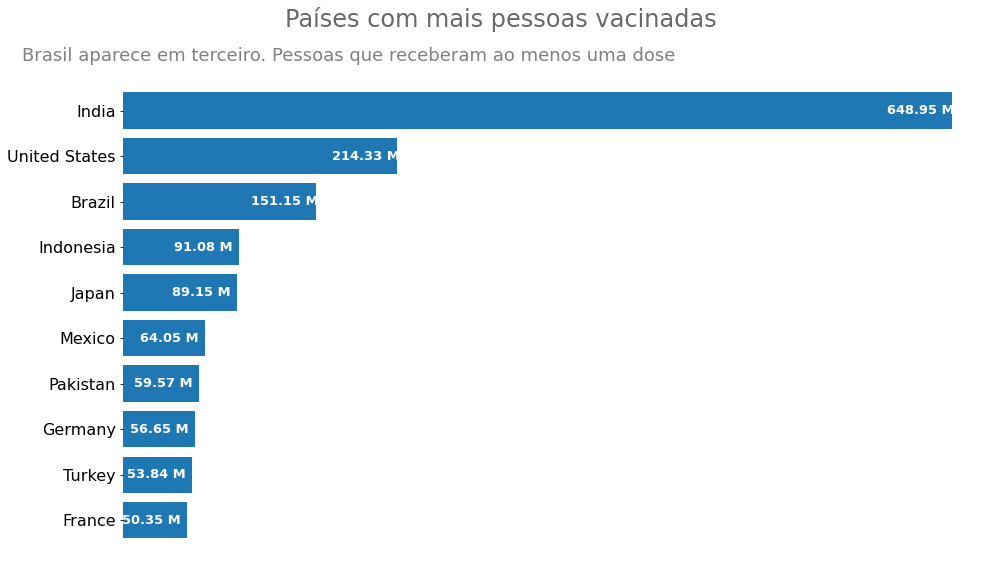

In [66]:
fig, ax = plt.subplots()
x = temp['location']
y = temp['people_vaccinated']

ind = range(len(y))
ax.barh(ind, y)
ax.set_yticks(ind)
ax.set_yticklabels(x)

labels = y.values
ax.bar_label(ax.containers[0], padding=-65, labels=map(eng_format, labels),
             color='white', fontsize=13, weight='bold')

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticklabels([])
ax.set_xticks([])

ax.set_frame_on(False)
ax.invert_yaxis()

plt.suptitle('Países com mais pessoas vacinadas\n', 
             color='dimgray')
plt.gcf().text(0.025, 0.85, 'Brasil aparece em terceiro. Pessoas que receberam ao menos uma dose\n', 
               fontsize=18, color='gray')
plt.show()

Vemos aqui que a Índia, considerando sua imensa população, já vacinou com ao menos uma dose cerca de metade das pessoas. Brasil e Estados Unidos também possuem quantidades significativas de pessoas vacinadas. Lembrando que não necessariamente o número a ser buscado é 100 % tendo em vista que os protocolos atuais não preveem vacinações em crianças.

Vamos verificar cada país por continente:

In [67]:
fig = px.treemap(df_countries_last_date.dropna(how='all', subset=['people_vaccinated']), 
                 path=[px.Constant('World'), 'continent','location'], 
                 values='people_vaccinated',
                 color='people_vaccinated',                  
                 color_continuous_scale='Blues',
                 custom_data=['people_vaccinated'],
                 )

fig.data[0].customdata[-1] = df_world.loc[df_world['date'] == last_date, 'people_vaccinated']
fig.data[0].customdata[-7:-1] = df_continent_last_date[['people_vaccinated']].values


fig.update_traces(hovertemplate='<b>%{label}</b><br>%{customdata:,.2f}')
fig.update_layout(margin = dict(t=80, l=0, r=0, b=10), 
                  coloraxis_colorbar=dict(title=None, thickness=30, len=1),                  
                  title={
                      'text': 'Total de pessoas vacinadas<br>',
                      'font': {'size': 24, 'color': 'dimgray'},
                      'y':0.95,
                      'x':0.5,
                      'xanchor': 'center',
                      'yanchor': 'top'},
                 annotations= [{
                     'text': "Pessoas vacinadas (ao menos uma dose) por continente e país. Clique em um continente para detalhes",
                     'font': {
                         'size': 18,
                         'color': 'gray',
                     },
                     'showarrow': False,
                     'align': 'left',
                     'x': 0.0,
                     'y': 1.1,
                     'xanchor': 'left',
                     'yanchor': 'top',
                 }])

fig.show()


Observe que o gráfico acima possui menos países que os mostrados anteriormente para casos e óbtidos. Isto se deve ao fato de que nem todos os países possuem registros oficiais de vacinados de onde a OWID possa obter dados. O intervalo de disponibilização dos dados também é distinto para cada país, de forma que comparações devem ser feitas com cautela.

Assim como para casos e óbitos, análises comparativas fazem mais sentido com números relativos ao total da população de cada localidade. Vejamos então os locais com maior percentual da população vacinada:

In [68]:
temp = df_countries_last_date.loc[:, ['location', 
                                      'continent',
                                      'population',
                                      'people_vaccinated_per_hundred']].sort_values(by="people_vaccinated_per_hundred", 
                                                                                    ascending=False)[0:10]

with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(HTML(temp.reset_index(drop=True).to_html(index=False)))

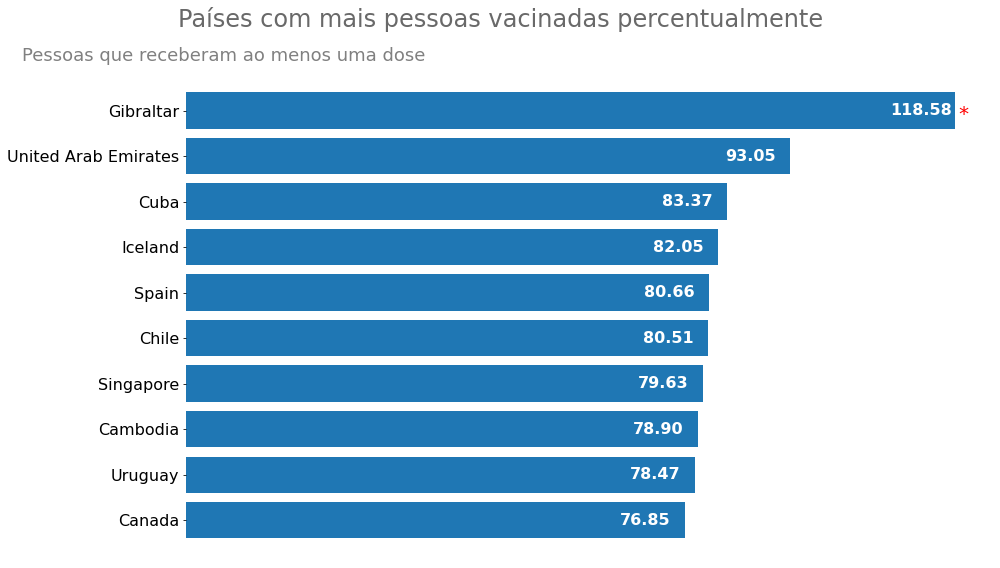

In [69]:
fig, ax = plt.subplots()
x = temp['location']
y = temp['people_vaccinated_per_hundred']

ind = range(len(y))
ax.barh(ind, y)
ax.set_yticks(ind)
ax.set_yticklabels(x)

labels = y.values
ax.bar_label(ax.containers[0], padding=-65, labels=map(eng_format, labels),
             color='white', fontsize=16, weight='bold')

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticklabels([])
ax.set_xticks([])

ax.set_frame_on(False)
ax.invert_yaxis()

plt.suptitle('Países com mais pessoas vacinadas percentualmente\n', 
             color='dimgray')
plt.gcf().text(0.025, 0.85, 'Pessoas que receberam ao menos uma dose\n', 
               fontsize=18, color='gray')

ax.annotate('*', xy=(120, 0.2), xytext=(119, 0.2), size=20, color='red')
plt.show()

Obviamente que o valor para Gibraltar está equivocado. [De acordo com a OWID](https://ourworldindata.org/covid-vaccinations#frequently-asked-questions), valores maiores do que 100 % podem ocorrer quando os valores para população estão desatualizados e/ou quando pessoas não residentes nos locais acabam entrando na conta como, por exemplo, turistas. No caso de Gibraltar, o aspecto turístico pode estar causando essa distorção.

Como era de se esperar, vemos o predomínio de localidades relativamente pequenas no que diz respeito ao número de habitantes. Vejamos um gráfico de países por continente:

In [70]:
fig = px.treemap(df_countries_last_date.dropna(how='all', subset=['people_vaccinated_per_hundred']), 
                 path=[px.Constant('World'), 'continent','location'], 
                 values='people_vaccinated_per_hundred',
                 color='people_vaccinated_per_hundred',
                 color_continuous_scale='Blues',
                 custom_data=['people_vaccinated_per_hundred'],
                 )

fig.data[0].customdata[-1] = df_world.loc[df_world['date'] == last_date, 'people_vaccinated_per_hundred']
fig.data[0].customdata[-7:-1] = df_continent_last_date[['people_vaccinated_per_hundred']].values

fig.update_traces(hovertemplate='<b>%{label}</b><br>%{customdata:,.2f}')
fig.update_layout(margin = dict(t=80, l=0, r=0, b=10), 
                  coloraxis_colorbar=dict(title=None, thickness=30, len=1),                  
                  title={
                      'text': 'Percentual de pessoas vacinadas<br>',
                      'font': {'size': 24, 'color': 'dimgray'},
                      'y':0.95,
                      'x':0.5,
                      'xanchor': 'center',
                      'yanchor': 'top'},
                 annotations= [{
                     'text': "Percentual (ao menos uma dose) por continente e país. Clique em um continente para detalhes",
                     'font': {
                         'size': 18,
                         'color': 'gray',
                     },
                     'showarrow': False,
                     'align': 'left',
                     'x': 0.0,
                     'y': 1.1,
                     'xanchor': 'left',
                     'yanchor': 'top',
                 }])

fig.show()


Vejamos se há alguma relação entre quantidade de vacinados e PIB per capita e se países com pessoas mais velhas estão se vacinando mais:

In [71]:
fig = px.scatter(df_countries_last_date.dropna(how='all', 
                                               subset=['gdp_per_capita']), 
                 x='median_age', 
                 y='people_vaccinated_per_hundred', 
                 size='gdp_per_capita', 
                 color='continent', 
                 hover_name='location', 
                 size_max=40, 
                 width=900, 
                 )

fig.update_layout(
    margin = dict(t=80, l=0, r=200, b=10), 
    title={
        'text': 'Percentual de vacinados (ao menos uma dose) e mediana de idade da população<br>',
        'font': {'size': 24, 'color': 'dimgray'},
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis={
        'title': 'Mediana de idade da população',        
    },
    yaxis={
        'title': 'Percentual de vacinados',        
    },
    legend={
        'title': ''
    },
    annotations=[{
        'text': '<b>Tamanho</b>: PIB per capita. <b>Cor</b>: continente',
        'font': {
            'size': 18,
            'color': 'gray',
        },
        'showarrow': False,
        'align': 'left',
        'x': 0.0,
        'y': 1.1,
        'xanchor': 'left',
        'yanchor': 'top',
        'xref': 'paper', 
        'yref': 'paper',
    }]
)

fig.show()

Como já discutido anteriormente, países com maior PIB per capita tendem a ter uma população mais velha e, pelo gráfico, uma maior parcela da população vacinada. Faz sentido se considerarmos que há custo envolvido em adquirir as vacinas, de forma que países mais ricos tendem a conseguir adquirir vacinas mais facilmente e a ter melhores condições de realizar grandes campanhas de vacinação.

### Novas vacinações

Já vimos a evolução dos números totais, vejamos agora a evolução de novas vacinações:

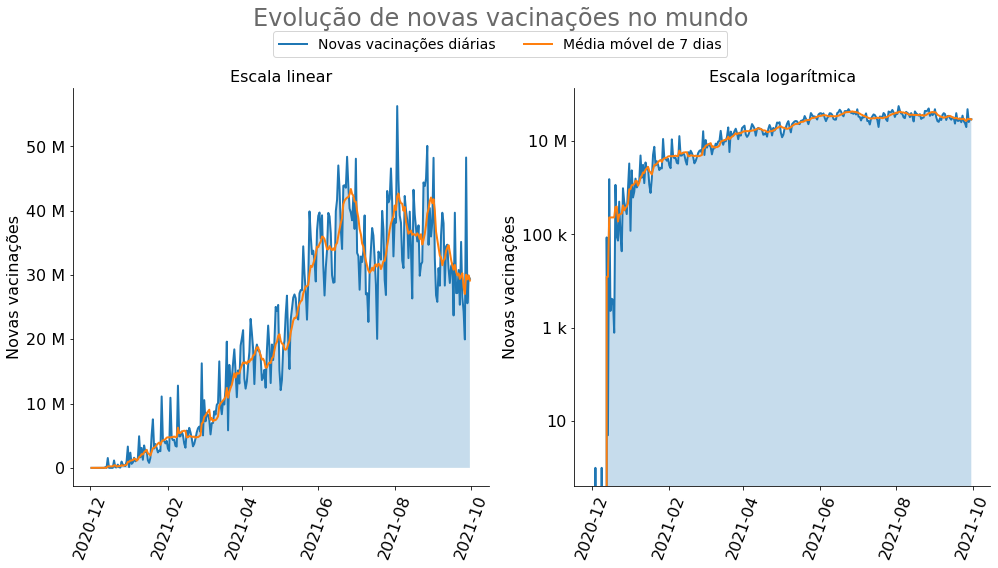

In [72]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

x = df.loc[df['location'] == 'World', 'date']
y = df.loc[df['location'] == 'World', 'new_vaccinations']
y2 = df.loc[df['location'] == 'World', 'new_vaccinations_smoothed']

for ax in (ax1, ax2):
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(myFmt)
    ax.tick_params(axis='x', rotation=70)
    ax.set_ylabel('Novas vacinações')
    ax.fill_between(x, y, alpha=0.25)

ax1.plot(x, y, label='Novas vacinações diárias')
ax1.plot(x, y2, label='Média móvel de 7 dias')
ax1.yaxis.set_major_formatter(EngFormatter())
ax1.set_title('Escala linear')

ax2.plot(x, y)
ax2.plot(x, y2)
ax2.set_yscale('log')
ax2.yaxis.set_major_formatter(EngFormatter())
ax2.set_title('Escala logarítmica')

plt.suptitle('Evolução de novas vacinações no mundo\n', 
             color='dimgray')

handles, labels = ax1.get_legend_handles_labels()

fig.legend(bbox_to_anchor=(0.5, 0.95), loc='upper center', ncol=8,
          handles=handles, labels=labels)
plt.show()

Vemos que há uma tendência decrescente. Podemos considerar algumas hipóteses para este declínio que, provavelmente, ocorrem em conjunto:

- a mais evidente é que à medida que mais pessoas completam o protocolo de vacinação, menos vacinas são tomadas;
- países mais pobres estão tendo [dificuldades de adquirir vacinas](https://www.nature.com/articles/d41586-021-02383-z). Conforme o artigo do link, há pressão para que as patentes das tecnologias aplicadas pelas grandes farmacêuticas sejam quebradas para que empresas locais possam fabricar as vacinas a um menor custo. Ou que sejam feitas colaborações com as tais empresas;
- menos pessoas querendo se vacinar, por diversos motivos como (evidências nos links):
    - a crescente percepção pública e de cientistas de que as [vacinas são menos eficazes](https://www.nature.com/articles/d41586-021-02532-4) do que inicialmente se pensava, especialmente devido ao surgimento de variantes;
    - crescente desconfiança quanto a potenciais conflitos de interesse que eventualmente contribuíram para [a aprovação emergencial das vacinas](https://www.bmj.com/content/373/bmj.n1283) com [triagem diferenciada](https://ncirs.org.au/phases-clinical-trials) e para o boicote a medicamentos utilizados no que ficou conhecido como [tratamento precoce](https://www.sciencedirect.com/science/article/pii/S2052297520300627);
    - crescente revolta entre a população de diversos países frente à imposição dos chamados passaportes de vacinação. Exemplos [aqui](https://www.foxnews.com/world/protesters-pack-paris-streets-in-defiance-of-covid-19-vaccine-passport-our-freedoms-are-dying) e [aqui](https://www.bmj.com/content/375/bmj.n2575).
    
Qual dos motivos apontados contribui mais ou se há mais algum motivo é difícil de avaliar com base nos dados disponíveis.

## Comparações e correlações

<center><img alt="covid_banner" width="50%" src="https://image.freepik.com/free-photo/close-up-pen-market-research_1098-3465.jpg"></center>

Já analisamos casos, óbitos e vacinações de forma separada. Vamos começar a buscar comparações e correlações. Primeiro, vamos comparar a ordem de grandeza entre casos, mortes e vacinações:

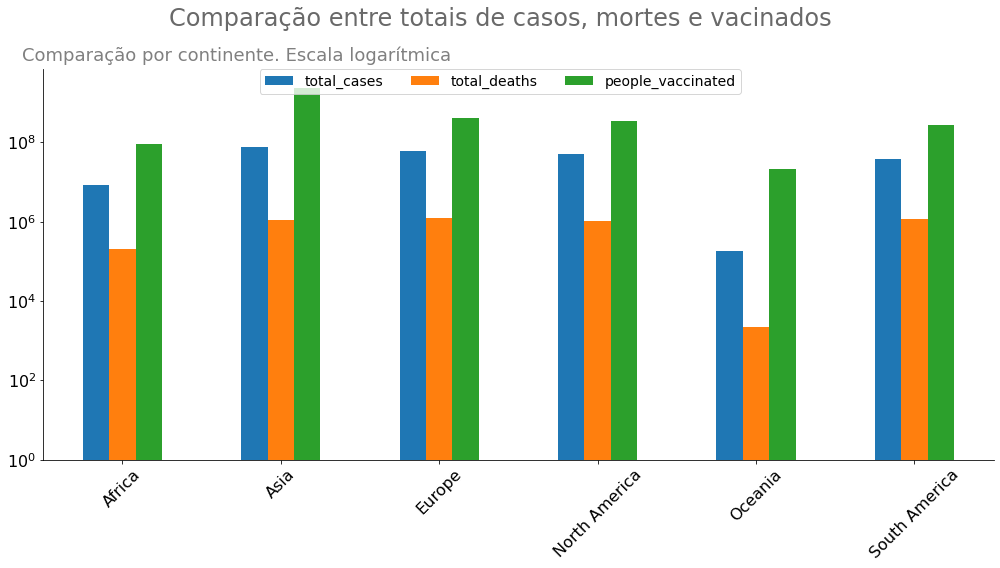

In [73]:
fig, ax = plt.subplots()

df_continent_last_date.plot(kind='bar', x='location', y=['total_cases', 
                                                         'total_deaths', 
                                                         'people_vaccinated'],
                            log=True, ax=ax, legend=False)

ax.set_xlabel(None)
ax.tick_params(axis='x', rotation=45)

plt.suptitle('Comparação entre totais de casos, mortes e vacinados\n', 
             color='dimgray')
plt.gcf().text(0.025, 0.85, 'Comparação por continente. Escala logarítmica\n', 
               fontsize=18, color='gray')

handles, labels = ax.get_legend_handles_labels()
        
fig.legend(bbox_to_anchor=(0.5, 0.885), loc='upper center', ncol=8,
          handles=handles, labels=labels)

plt.show()

Como já abordado brevemente anteriormente, há uma diferença de cerca de duas ordens de grandeza entre casos e mortes. Podemos ver isto também em um gráfico com os mesmos dados por milhão de habitantes:

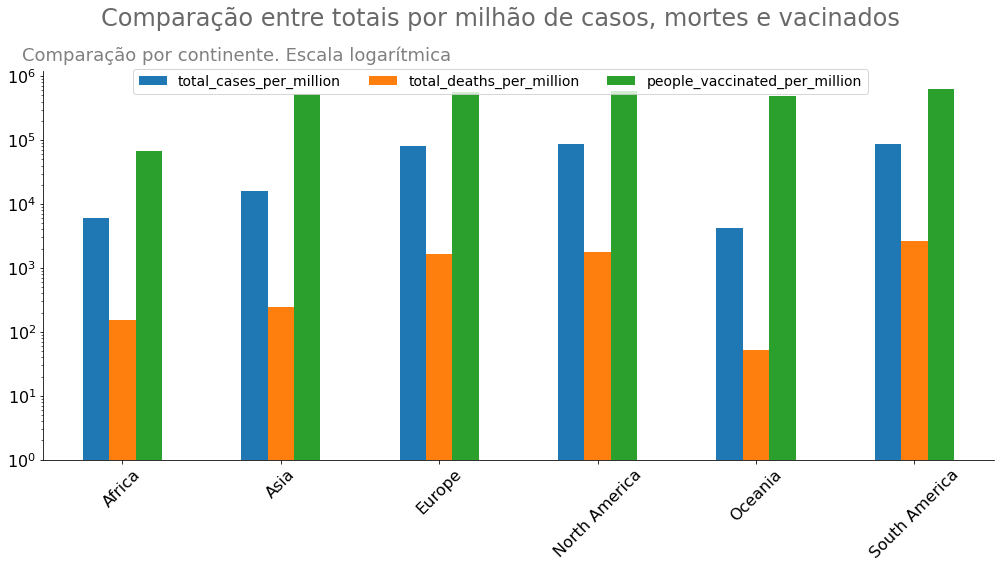

In [74]:
with pd.option_context('mode.chained_assignment', None):
    df_continent_last_date['people_vaccinated_per_million'] = df_continent_last_date['people_vaccinated_per_hundred'] * 1E4

fig, ax = plt.subplots()
df_continent_last_date.plot(kind='bar', x='location', y=['total_cases_per_million',
                                                         'total_deaths_per_million',
                                                         'people_vaccinated_per_million'], 
                            log=True, ax=ax, legend=False)

ax.set_xlabel(None)
ax.tick_params(axis='x', rotation=45)

plt.suptitle('Comparação entre totais por milhão de casos, mortes e vacinados\n', 
             color='dimgray')
plt.gcf().text(0.025, 0.85, 'Comparação por continente. Escala logarítmica\n', 
               fontsize=18, color='gray')

handles, labels = ax.get_legend_handles_labels()
        
fig.legend(bbox_to_anchor=(0.5, 0.885), loc='upper center', ncol=8,
          handles=handles, labels=labels)

plt.show()

Esta observação está coerente com estudos que indicam que a mortalidade da COVID-19 fica em torno de 1 a 2 %. Cabe ressaltar que há diferentes formas de cálculo e interpretações para mortalidade [como mostra esse material da OMS](https://www.who.int/news-room/commentaries/detail/estimating-mortality-from-covid-19), especialmente com a pandemia em andamento. E já vimos que há diversas questões envolvendo a disponibilização de dados por parte de alguns países. 

No entanto, se confirmada essa faixa de mortalidade, a pandemia de COVID-19 seria [proporcionalmente menos fatal](https://www.news-medical.net/health/How-does-the-COVID-19-Pandemic-Compare-to-Other-Pandemics.aspx) que outras pandemias no último século. O que diferencia a COVID-19, segundo [estudos](https://tdtmvjournal.biomedcentral.com/articles/10.1186/s40794-020-00129-9), é sua alta transmissibilidade que a espalhou por todo o planeta, de forma que a contagem total de mortos se tornou elevada. Cabe ressaltar que, como toda comparação, cuidados devem ser tomados e há [estudos](https://www.cambridge.org/core/journals/infection-control-and-hospital-epidemiology/article/why-comparing-coronavirus-disease-2019-covid19-and-seasonal-influenza-fatality-rates-is-like-comparing-apples-to-pears/FDFE92B10895C57C42F59C2422DB7582) que abordam tais cuidados, que fogem ao escopo deste trabalho.

Durante a análise, em alguns momentos correlações de casos e óbitos com idade da população e PIB per capita foram estudadas. Vamos avaliar, através de [matrizes de correlação](https://en.wikipedia.org/wiki/Correlation), se há correlações positivas ou negativas entre variáveis. Comecemos procurando relações entre totais de casos/óbitos com vacinação, indicadores de riqueza e indicadores de idade:

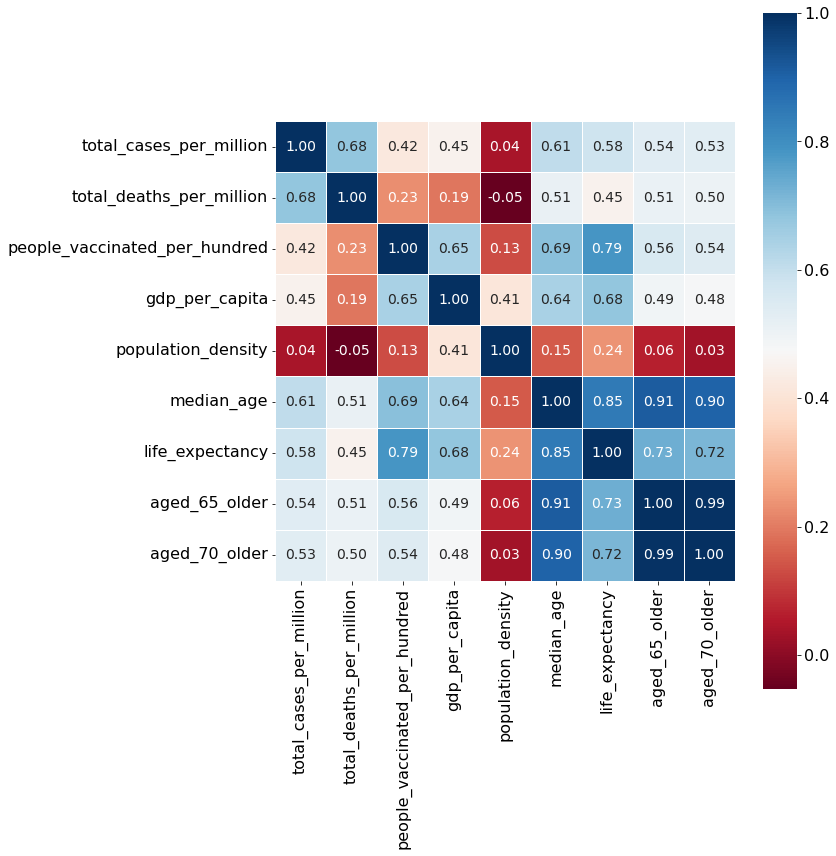

In [75]:
corr_countries = df_countries_last_date[['total_cases_per_million',
                                         'total_deaths_per_million', 
                                         'people_vaccinated_per_hundred',                                
                                         'gdp_per_capita',
                                         'population_density',
                                         'median_age',
                                         'life_expectancy',
                                         'aged_65_older',
                                         'aged_70_older']].corr()


fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(corr_countries, cmap='RdBu', fmt='.2f', square=True, 
            linecolor='white', annot=True, linewidths=.5, ax=ax,
            annot_kws={'size':14});


Podemos criar matriz similar mas para novos casos/óbitos/vacinações e suas relações com índices que variam no tempo:

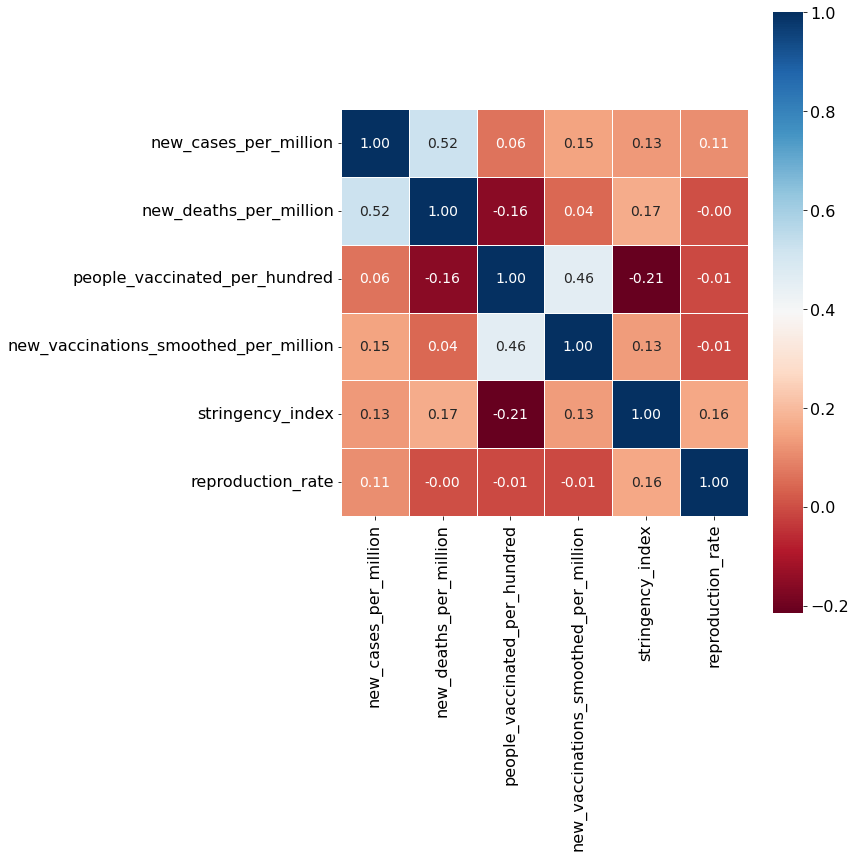

In [76]:
corr_countries = df_countries[['new_cases_per_million', 
                               'new_deaths_per_million', 
                               'people_vaccinated_per_hundred', 
                               'new_vaccinations_smoothed_per_million', 
                               'stringency_index',
                               'reproduction_rate',]].corr()


fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(corr_countries, cmap='RdBu', fmt='.2f', square=True, 
            linecolor='white', annot=True, linewidths=.5, ax=ax,
            annot_kws={'size':14});


Nas figuras acima temos algumas correlações mais óbvias e que já foram discutidas no decorrer do estudo, que são:

- correlação positiva entre idades mais avançadas e maior PIB per capita;
- correlação positiva entre mais pessoas vacinadas e maior PIB per capita;
- como consequência das anteriores, correlação positiva entre pessoas vacinadas e idades mais avançadas

Outras correlações:

- correlação positiva entre pessoas vacinadas e casos por milhão;
- correlação negativa entre pessoas vacinadas e mortes por milhão;
- correlação positiva entre o índice de restrição e a taxa de reprodução efetiva;
- correlação positiva entre o índice de restrição e novos casos;
- correlação positiva entre o índice de restrição e novas mortes;

Estas três últimas correlações, embora fracas, encontram respaldo em algumas publicações científicas recentes, como [esta](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3711686) e [esta](https://onlinelibrary.wiley.com/doi/10.1111/eci.13484), que parecem indicar ineficácia ou mesmo piora no número de casos e óbitos devido ao uso de medidas restritivas.

Muito se fala sobre o efeito de comorbidades, vamos verificar se há correlações envolvendo as variáveis referentes a doenças:

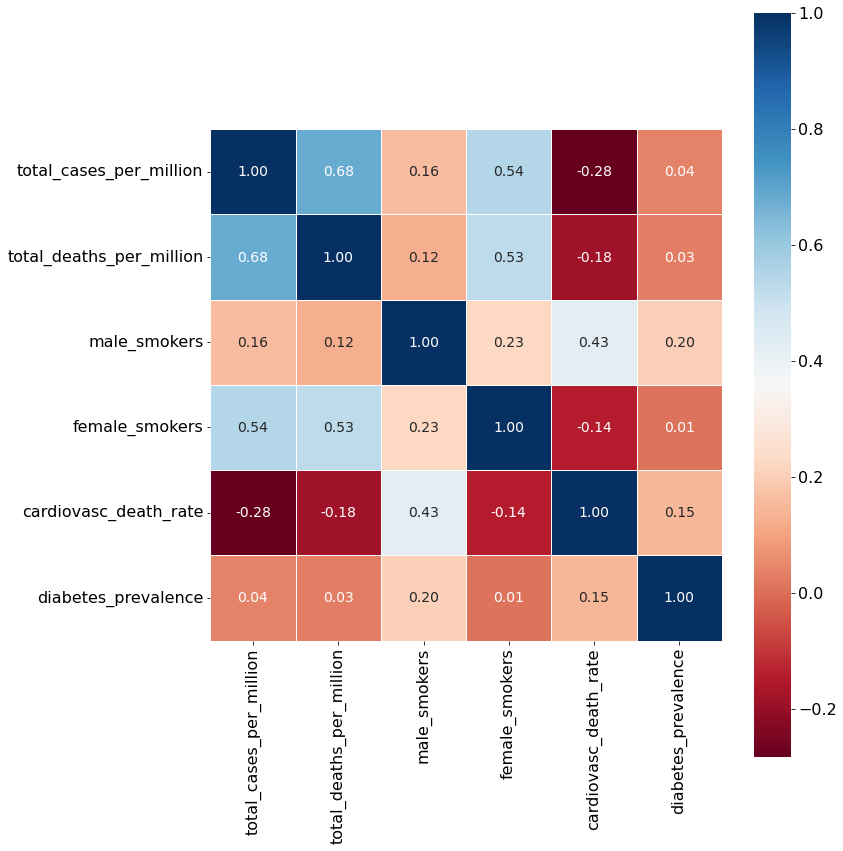

In [77]:
corr_countries = df_countries_last_date[['total_cases_per_million',
                                         'total_deaths_per_million', 
                                         'male_smokers', 'female_smokers',                               
                                         'cardiovasc_death_rate', 
                                         'diabetes_prevalence',
                                        ]].corr()
# display(corr_countries)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_countries, cmap='RdBu', fmt='.2f', square=True, 
            linecolor='white', linewidths=.5, annot=True, ax=ax,
            annot_kws={'size':14});

Curiosamente há relação negativa entre taxa de mortalidade por doenças cardiovasculares (lembrando que os dados são de 2017) e casos e óbitos. E há relação positiva entre mulheres fumantes e casos e óbitos, assim como para homens mas com valores menores. Não se pode fazer análises muito profundas com base nestes dados pois não significa que as pessoas que tiveram os casos ou morreram tinham as doenças ou fumavam. Os dados de fumantes e doenças são para cada localidade e não para cada indivíduo.

## Brasil

<center><img alt="covid_banner" width="50%" src="https://image.freepik.com/free-photo/realistic-shot-waving-flag-brazil-with-interesting-textures_181624-11214.jpg"></center>

Para terminar, vamos abordar um pouco da situação brasileira. Em alguns momentos durante o estudo alguns comentários já foram feitos acerca do país, então apenas complementaremos com o que ficou faltando. 

Comecemos verificando como a evolução de novos casos se relaciona com as datas de surgimento de novas variantes e com os períodos de inverno:

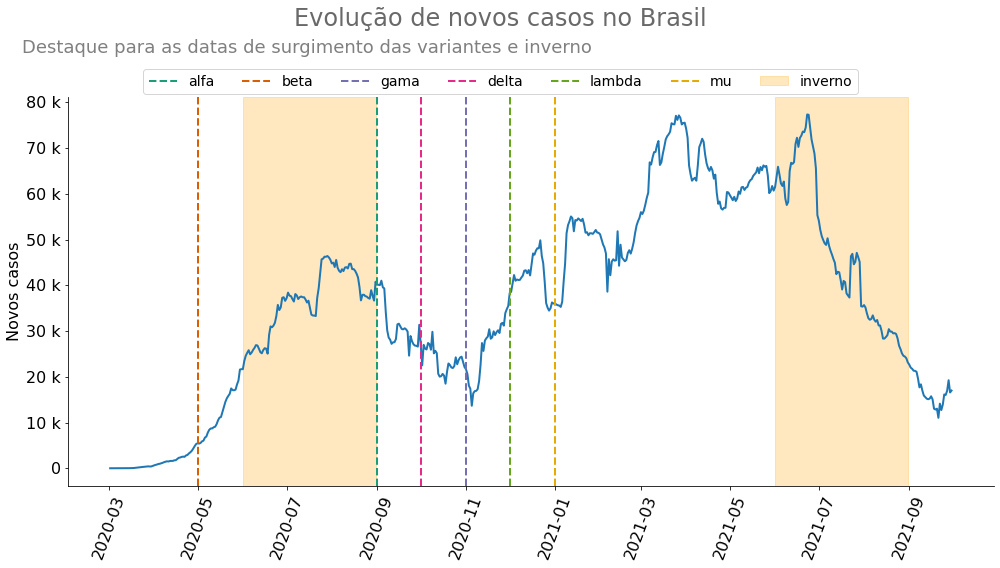

In [78]:
fig, ax = plt.subplots()

x = df.loc[df['location'] == 'Brazil', 'date']
y2 = df.loc[df['location'] == 'Brazil', 'new_cases_smoothed']

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(myFmt)
ax.tick_params(axis='x', rotation=70)
ax.set_ylabel('Novos casos')


ax.plot(x, y2)
ax.yaxis.set_major_formatter(EngFormatter())
ax.axvspan(*mdates.datestr2num(['2020-06-1', '2020-08-31']), color='orange', alpha=0.25, label='inverno')
ax.axvspan(*mdates.datestr2num(['2021-06-1', '2021-08-31']), color='orange', alpha=0.25)

for color, var in zip(colors, variants):
    ax.axvline(x=variants[var], label=var, linestyle='--', color=color)

plt.suptitle('Evolução de novos casos no Brasil\n\n', 
             color='dimgray')

plt.gcf().text(0.025, 0.865, 'Destaque para as datas de surgimento das variantes e inverno\n', 
               fontsize=18, color='gray')

handles, labels = ax.get_legend_handles_labels()

fig.legend(bbox_to_anchor=(0.5, 0.885), loc='upper center', ncol=8,
          handles=handles, labels=labels)

plt.show()

No gráfico há um aumento significativo de casos logo após a variante gama, cujo primeira amostra foi no país. No entanto, cabe ressaltar que as variantes podem demorar um certo tempo para se espalhar pelo mundo, de forma que as datas das outras variantes não necessariamente são estas no país.

Há picos de casos nos invernos, porém o maior pico foi entre março e maio de 2021. E no último inverno tivemos um pico no início da estação mas um perfil decrescente na parte final.

Vejamos o perfil de novos óbitos:

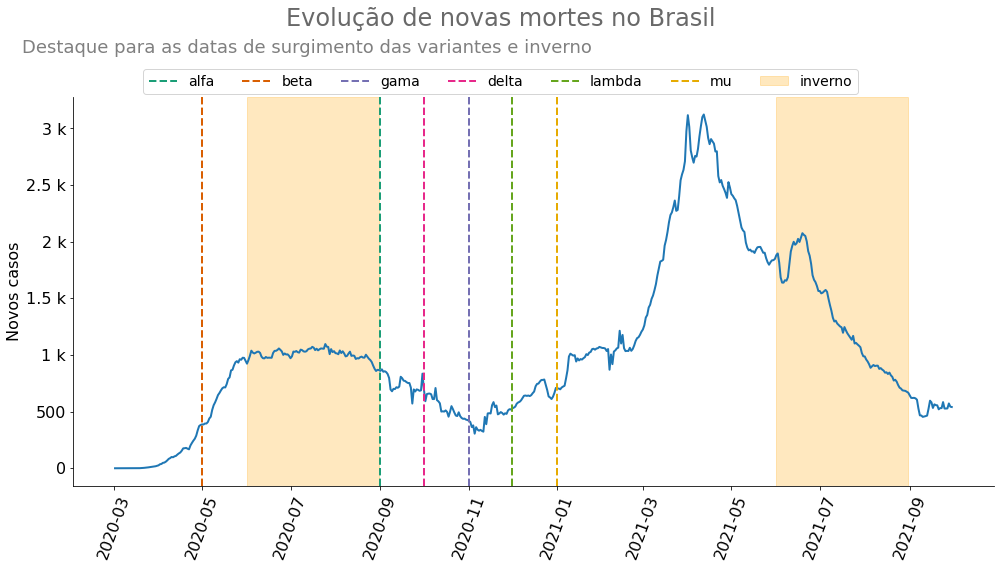

In [79]:
fig, ax = plt.subplots()

x = df.loc[df['location'] == 'Brazil', 'date']
y2 = df.loc[df['location'] == 'Brazil', 'new_deaths_smoothed']

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(myFmt)
ax.tick_params(axis='x', rotation=70)
ax.set_ylabel('Novos casos')


ax.plot(x, y2)
ax.yaxis.set_major_formatter(EngFormatter())
ax.axvspan(*mdates.datestr2num(['2020-06-1', '2020-08-31']), color='orange', alpha=0.25, label='inverno')
ax.axvspan(*mdates.datestr2num(['2021-06-1', '2021-08-31']), color='orange', alpha=0.25)

for color, var in zip(colors, variants):
    ax.axvline(x=variants[var], label=var, linestyle='--', color=color)

plt.suptitle('Evolução de novas mortes no Brasil\n\n', 
             color='dimgray')

plt.gcf().text(0.025, 0.865, 'Destaque para as datas de surgimento das variantes e inverno\n', 
               fontsize=18, color='gray')

handles, labels = ax.get_legend_handles_labels()

fig.legend(bbox_to_anchor=(0.5, 0.885), loc='upper center', ncol=8,
          handles=handles, labels=labels)

plt.show()

Vemos que o perfil de novos óbitos segue o de novos casos, mas em menor ordem de grandeza.

Infelizmente a base de dados é bem incompleta para o Brasil. Vejamos:

In [80]:
df_brazil = df.loc[df['location'] == "Brazil"].copy()
df_brazil.head()

iso_code  ... excess_mortality_cumulative_per_million
15583      BRA  ...                                     NaN
15584      BRA  ...                                     NaN
15585      BRA  ...                                     NaN
15586      BRA  ...                               32.943066
15587      BRA  ...                                     NaN

[5 rows x 65 columns]

In [81]:
df_brazil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 15583 to 16165
Data columns (total 65 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   iso_code                                 583 non-null    object        
 1   continent                                583 non-null    object        
 2   location                                 583 non-null    object        
 3   date                                     583 non-null    datetime64[ns]
 4   total_cases                              583 non-null    float64       
 5   new_cases                                582 non-null    float64       
 6   new_cases_smoothed                       578 non-null    float64       
 7   total_deaths                             563 non-null    float64       
 8   new_deaths                               563 non-null    float64       
 9   new_deaths_smoothed                  

In [82]:
for cat in columns_per_category:
    print(f'{cat.upper():^30}')
    print((df_brazil[list(columns_per_category[cat])].isnull().sum() / df_brazil.shape[0]).sort_values(ascending=False))
    print()

            OTHERS            
handwashing_facilities        1.0
human_development_index       0.0
aged_70_older                 0.0
continent                     0.0
location                      0.0
date                          0.0
population                    0.0
population_density            0.0
median_age                    0.0
aged_65_older                 0.0
gdp_per_capita                0.0
life_expectancy               0.0
extreme_poverty               0.0
cardiovasc_death_rate         0.0
diabetes_prevalence           0.0
female_smokers                0.0
male_smokers                  0.0
hospital_beds_per_thousand    0.0
iso_code                      0.0
dtype: float64

       CONFIRMED CASES        
new_cases_smoothed_per_million    0.008576
new_cases_smoothed                0.008576
new_cases_per_million             0.001715
new_cases                         0.001715
total_cases_per_million           0.000000
total_cases                       0.000000
dtype: float64

  

Vemos que há diversos dados ausentes referentes a hospitalizações e testes. Em breve farei um estudo focado no país utilizando dados oficias governamentais. Acompanhe meu [perfil no LinkedIn](https://www.linkedin.com/in/flsbustamante/) para saber quando eu divulgar. 

## Conclusões


<center><img alt="covid_banner" width="50%" src="https://image.freepik.com/free-photo/digital-world-map-hologram-blue-background_1379-901.jpg"></center>

Foi um longo estudo, mas espero que tenha sido proveitoso e que tenha trazido novas visões a respeito da pandemia. Busquei colocar links para diversas notícias e estudos com o intuito de embasar afirmações e facilitar a compreensão por parte dos leitores. Vamos fazer uma breve recaptulação do que foi mostrado:

- evolução de casos e mortes e possíveis relações com variantes 
- sazonalidade dos casos e mortes e possível relação com períodos de inverno
- importância de avaliar os dados por milhão de habitantes ao invés dos totais
- correlações existentes entre diversas variáveis

Caso tenha dúvidas, comentários e/ou críticas construtivas me procure:

- [LinkedIn](https://www.linkedin.com/in/flsbustamante/)
- [GitHub](https://github.com/chicolucio)
- [Site](https://franciscobustamante.com.br/)